In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [4]:
head(airbnb)

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [5]:
str(airbnb)

'data.frame':	13207 obs. of  13 variables:
 $ Zipcode               : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Neighbourhood.Cleansed: Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ Property.Type         : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ Room.Type             : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ Accommodates          : int  2 6 3 3 5 2 7 3 2 4 ...
 $ Bathrooms             : num  2 1 1 2 1 1 5 1 1 2 ...
 $ Bedrooms              : int  1 3 2 1 1 0 1 1 1 2 ...
 $ Beds                  : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ Bed.Type              : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Amenities             : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ Square.Feet           : int  NA NA NA NA 538 NA NA NA 

In [7]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


In [6]:
names(airbnb)<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


In [7]:
head(airbnb)

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28004        Universidad Apartment     Private room    2            2        
2 28004        Universidad Apartment     Entire home/apt 6            1        
3 28004        Universidad Apartment     Entire home/apt 3            1        
4 28004        Universidad Loft          Entire home/apt 3            2        
5 28015        Universidad Apartment     Entire home/apt 5            1        
6 28004        Universidad Apartment     Entire home/apt 2            1        
  NumDormitorios NumCamas TipoCama
1 1              1        Real Bed
2 3              5        Real Bed
3 2              2        Real Bed
4 1              1        Real Bed
5 1              1        Real Bed
6 0              1        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                                                     
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  PiesCuadrados Precio Puntuacion
1  NA           35      NA       
2  NA           92      96       
3  NA           55      91       
4  NA           60     100       
5 538           75      90       
6  NA           55      95

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [1536]:
airbnb$MetrosCuadrados<-(airbnb$PiesCuadrados*0.092903 )
head(airbnb)

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28004        Universidad Apartment     Private room    2            2        
2 28004        Universidad Apartment     Entire home/apt 6            1        
3 28004        Universidad Apartment     Entire home/apt 3            1        
4 28004        Universidad Loft          Entire home/apt 3            2        
5 28015        Universidad Apartment     Entire home/apt 5            1        
6 28004        Universidad Apartment     Entire home/apt 2            1        
  NumDormitorios NumCamas TipoCama
1 1              1        Real Bed
2 3              5        Real Bed
3 2              2        Real Bed
4 1              1        Real Bed
5 1              1        Real Bed
6 0              1        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                                                     
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  PiesCuadrados Precio Puntuacion MetrosCuadrados
1  NA           35      NA              NA       
2  NA           92      96              NA       
3  NA           55      91              NA       
4  NA           60     100              NA       
5 538           75      90        49.98181       
6  NA           55      95              NA

In [1538]:
library(dplyr)
library(tidyr)

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [1064]:
airbnb$CodigoPostal


[1] 28004        28004        28004        28004        28015       
    [6] 28004        28004        28004        28015        28004       
   [11] 28004        28004        28013        28005        28013       
   [16] 28013        28013        28012        28013        28013       
   [21] 28013        28005        28013        28012        28012       
   [26] 28013        28014        28013        28012        28005       
   [31] 28005        28005        28005        28012        28005       
   [36] 28005        28045        28005        28005        28005       
   [41] 28005        28005        28013        28013        28013       
   [46] 28013        28013        28012        28013        28012       
   [51] 28013        28013        28013        28012        28013       
   [56] 28013        28012        27013                     28045       
   [61] 28045        28045        28045        28045        28045       
   [66] 28045        28045        28045        28045        28045       
   [71] 28045        28012        28045        28045        28045       
   [76] 28045        28012        28012        28012        28012       
   [81] 28005        28012                     28005        28012       
   [86] 28012        28012        28012        28012        28005       
   [91] 28012        28005        28005        28012        28005       
   [96] 28012        28012        28005        28005        28005       
  [101] 28012        28012        28005        28012        28014       
  [106] 28014        28014        28014        28012        28014       
  [111] 28014        28014        28012        28014        28014       
  [116] 28014        28014        28014        28012        28012       
  [121] 28014        28012        28012        28005        28012       
  [126] 28012        28012        28012        28012        28005       
  [131] 28005                     28012                     28012       
  [136] 28012        28012        28005        28012        28012       
  [141] 28014        28014        28045        28045        28045       
  [146] 28045        28007        28007        28007        28007       
  [151] 28007        28007        28028        28009        28009       
  [156] 28009        28009        28014        28014        28007       
  [161] 28005        28013        28005        28005        28013       
  [166] 28013        28013        28005        28013        28013       
  [171] 28005        28005        28005        28013        28013       
  [176] 28013        28005        28013        28005        28013       
  [181] 28013        28005        28013        28005        28013       
  [186] 28013        28005        28005        28013        28013       
  [191] 28005        28013        28005        28013        28005       
  [196] 28013        28005        28005        28005        28005       
  [201] 28005        28013        28005        28005        28005       
  [206] 28013        28013        28012        28005        28012       
  [211] 28005        28012        28005        28012        28012       
  [216] 28005        28012        28005        28012        28012       
  [221] 28012        28012        28012        28012        28012       
  [226] 28012        28012        28013        28013        28014       
  [231] 28012        28012        28012        28005        28005       
  [236] 28005        28012        28012        28005        28012       
  [241] 28012        28012        28012        28012        28012       
  [246] 28012        28014        28014        28014        28014       
  [251] 28012        28014        28014        28014        28014       
  [256] 28004        28004        28004        28004        28004       
  [261] 28004        28004        28004        28004        28004       
  [266] 28001        28001        28006        28001        28001       
  [271] 28001        28001        28001        28001        28

In [1065]:
airbnbN<-airbnb

In [1066]:
airbnbN[which(airbnbN$CodigoPostal=="28"),"CodigoPostal"]<- NA

In [1067]:
airbnbN[10278,]

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes
10278 NA           San Pascual Apartment     Entire home/apt 2           
      NumBanyos NumDormitorios NumCamas TipoCama
10278 1         1              2        Real Bed
      Comodidades                                            PiesCuadrados
10278 Kitchen,Elevator in building,Heating,Washer,Essentials NA           
      Precio Puntuacion MetrosCuadrados
10278 31     93         NA

In [1068]:
airbnbN$CodigoPostal<-(as.numeric(paste(airbnbN$CodigoPostal)))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [1069]:
airbnbN[which(airbnbN$CodigoPostal=="2804"),"CodigoPostal"]<- 28004

In [1070]:
airbnbN[which(airbnbN$CodigoPostal=="2805"),"CodigoPostal"]<- 28005

In [1071]:
airbnbN[which(airbnbN$CodigoPostal=="2815"),"CodigoPostal"]<- 28015

In [1072]:
airbnbN[12709,]

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes
12709 28004        Universidad Apartment     Entire home/apt 2           
      NumBanyos NumDormitorios NumCamas TipoCama
12709 1         1              1        Real Bed
      Comodidades                                                                                                                                           
12709 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron
      PiesCuadrados Precio Puntuacion MetrosCuadrados
12709 NA            45     95         NA

In [1073]:
which(airbnbN$CodigoPostal=="2805")

integer(0)

In [1074]:
which(airbnbN$CodigoPostal=="2815")

integer(0)

In [1539]:
airbnbN[1925,]

CodigoPostal Barrio      TipoPropiedad TipoAlquiler MaxOcupantes NumBanyos
1925 28005        Universidad Apartment     Private room 2            2.5      
     NumDormitorios NumCamas TipoCama
1925 4              1        Real Bed
     Comodidades                                                                                                                                                                                                                                                                                   
1925 TV,Cable TV,Internet,Wireless Internet,Kitchen,Doorman,Pets live on this property,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
     PiesCuadrados Precio Puntuacion MetrosCuadrados
1925 NA            27     100        NA

In [1540]:
airbnbN[10419,]

CodigoPostal Barrio    TipoPropiedad TipoAlquiler MaxOcupantes NumBanyos
10419 28015        Trafalgar Apartment     Private room 2            1        
      NumDormitorios NumCamas TipoCama
10419 1              1        Real Bed
      Comodidades                                                                                                                                                                                                                 
10419 TV,Internet,Wireless Internet,Kitchen,Breakfast,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo,translation missing: en.hosting_amenity_49
      PiesCuadrados Precio Puntuacion MetrosCuadrados
10419 NA            80     NA         NA

In [679]:
airbnbN[14,]

CodigoPostal Barrio TipoPropiedad TipoAlquiler MaxOcupantes NumBanyos
14 28005        Sol    Apartment     Private room 2            1        
   NumDormitorios NumCamas TipoCama
14 1              1        Real Bed
   Comodidades                                                                                                                                                                                                                                                      
14 TV,Internet,Wireless Internet,Kitchen,Smoking allowed,Pets live on this property,Cat(s),Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
   PiesCuadrados Precio Puntuacion MetrosCuadrados
14 NA            46     97         NA

In [877]:
which(airbnbN$CodigoPostal=="28002")

[1]   365   366   368   369   405   406   407   639   640   641   643   644
 [13]   645   646   647   864   865   866   867  1306  1308  1309  1310  1311
 [25]  1312  1313  1772  1773  1774  1775  1776  1777  1778  1779  1780  2491
 [37]  2492  2493  2494  2495  2496  2849  2850  2874  2875  2876  2877  2878
 [49]  3479  3480  3481  3926  4496  4497  4598  4599  4600  5129  5131  5140
 [61]  5141  5507  5508  5509  5544  5545  6134  6135  6570  6571  6572  6574
 [73]  6575  6576  6792  6793  6794  6795  6816  6817  6818  7103  7104  7105
 [85]  7106  7123  7124  7125  7618  7619  7621  7622  7623  7624  7853  7854
 [97]  7855  7856  7857  7858  8182  8183  8184  8663  8664  8665  8707  8708
[109]  8709  8711  9272  9273  9275  9276  9277  9278  9279  9756  9757 10338
[121] 10339 10340 10341 10342 10343 10344 10345 10346 10347 10348 10565 10603
[133] 10606 10607 11185 11187 11188 11189 11190 11191 11231 11233 11500 11512
[145] 11514 11515 11516 11517 11518 11519 11573 11574 11575 11576 12101 12102
[157] 12129 12130 12418 12419 12420 12441 12442 13041 13042 13043 13120 13121
[169] 13123 13124

In [878]:
airbnbN[1778,]

CodigoPostal Barrio        TipoPropiedad TipoAlquiler    MaxOcupantes
1778 28002        Ciudad Jardín Apartment     Entire home/apt 4           
     NumBanyos NumDormitorios NumCamas TipoCama
1778 2         2              2        Real Bed
     Comodidades                                                                                                                                                    
1778 TV,Cable TV,Internet,Wireless Internet,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Iron
     PiesCuadrados Precio Puntuacion MetrosCuadrados
1778 NA            40     100        NA

In [879]:
which(airbnbN$CodigoPostal=="28004")

[1]     1     2     3     4     6     7     8    10    11    12   256   257
  [13]   258   259   260   261   262   263   264   265   291   292   293   294
  [25]   295   296   297   298   299   300   301   302   303   304   305   306
  [37]   307   308   309   310   311   312   314   315   316   318   319   321
  [49]   322   323   324   325   328   330   331   332   334   335   336   353
  [61]   520   521   522   523   524   525   526   528   529   531   532   533
  [73]   665   666   667   668   669   670   671   672   673   675   676   679
  [85]   722   723   724   725   726   727   728   729   730   731   732   733
  [97]   734   735   736   737   738   739   740   741   744   745   746   748
 [109]   749   750   751   752   753   756   758   760   761   769  1097  1139
 [121]  1143  1144  1146  1147  1148  1149  1150  1151  1152  1153  1154  1155
 [133]  1156  1158  1159  1160  1161  1162  1163  1165  1166  1167  1168  1169
 [145]  1170  1171  1172  1173  1174  1175  1176  1177  1178  1179  1180  1365
 [157]  1366  1367  1369  1370  1372  1373  1375  1376  1379  1381  1391  1392
 [169]  1393  1394  1395  1397  1398  1399  1400  1401  1402  1403  1442  1448
 [181]  1452  1453  1456  1457  1458  1461  1462  1465  1480  1481  1482  1483
 [193]  1485  1486  1487  1488  1489  1490  1491  1561  1562  1563  1564  1567
 [205]  1570  1571  1572  1573  1574  1577  1701  1703  1704  1706  1707  1708
 [217]  1709  1710  1711  1714  1715  1717  1718  1719  1720  1722  1723  1724
 [229]  1725  1726  1814  1815  1816  1818  1819  1892  1893  1894  1895  1896
 [241]  1898  1899  1900  1901  1902  1903  1904  1905  1906  1907  1908  1910
 [253]  1911  1912  1913  1914  1915  1916  1917  1918  1919  1920  1921  1922
 [265]  1923  1924  1926  1927  1928  1929  1930  1931  1932  1933  2066  2067
 [277]  2068  2069  2070  2071  2072  2073  2076  2077  2078  2080  2082  2083
 [289]  2095  2096  2097  2098  2099  2100  2101  2200  2201  2202  2203  2204
 [301]  2205  2207  2208  2209  2210  2211  2212  2356  2358  2360  2363  2364
 [313]  2365  2366  2367  2368  2369  2370  2371  2410  2411  2412  2413  2414
 [325]  2415  2416  2417  2419  2421  2606  2708  2709  2710  2711  2712  2713
 [337]  2714  2715  2717  2718  2719  2720  2721  2722  2725  2726  2727  2729
 [349]  2730  2732  2733  2734  2737  2738  2740  2741  2743  2745  2746  2748
 [361]  2750  2828  2917  2928  2929  2930  2931  2932  2933  2934  2935  2936
 [373]  2937  2938  2939  2940  2941  2942  2945  2946  2948  2950  2951  2975
 [385]  2976  2978  2979  2980  2981  2982  2983  2984  2987  2988  2989  2990
 [397]  2991  2992  2995  3059  3060  3061  3063  3064  3066  3067  3068  3200
 [409]  3255  3256  3257  3259  3260  3261  3262  3263  3264  3265  3266  3272
 [421]  3273  3274  3275  3276  3277  3278  3279  3280  3281  3282  3283  3284
 [433]  3285  3286  3287  3288  3289  3290  3299  3300  3301  3302  3303  3304
 [445]  3305  3306  3307  3308  3309  3310  3311  3314  3316  3317  3318  3319
 [457]  3320  3321  3324  3325  3326  3327  3329  3331  3340  3341  3343  3344
 [469]  3345  3346  3347  3348  3349  3350  3351  3352  3413  3561  3712  3713
 [481]  3717  3718  3720  3721  3723  3724  3725  3726  3727  3728  3729  3730
 [493]  3731  3732  3733  3734  3735  3736  3737  3738  3739  3740  3741  3742
 [505]  3744  3745  3746  3747  3748  3749  3750  3751  3752  3753  3755  3756
 [517]  3757  3758  3759  3760  3761  3763  3764  3766  3767  3768  3784  3785
 [529]  3788  3790  3972  4148  4149  4150  4151  4152  4153  4154  4155  4156
 [541]  4158  4159  4160  4161  4162  4163  4164  4165  4166  4167  4168  4169
 [553]  4171  4172  4173  4175  4176  4178  4180  4181  4182  4184  4186  4188
 [565]  4189  4190  4191  4192  4193  4194  4195  4196  4197  4198  4199  4201
 [577]  4203  4204  4207  4208  4372  4373  4375  4376  4377  4378  4381  4382
 [589]  4384  4385  4388  4410  4545  4546  4547  4548  4549  4550  4551  4552
 [601]  4553  4554  4555  4556  4557  4558  4559  456

In [683]:
airbnbN[1178,]

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes
1178 28004        Universidad Apartment     Entire home/apt 5           
     NumBanyos NumDormitorios NumCamas TipoCama
1178 1         1              2        Real Bed
     Comodidades                                                                                                                                                                    
1178 TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo
     PiesCuadrados Precio Puntuacion MetrosCuadrados
1178 NA            85     93         NA

In [684]:
airbnbN$CodigoPostal

[1]  28004  28004  28004  28004  28015  28004  28004  28004  28015  28004
   [11]  28004  28004  28013  28005  28013  28013  28013  28012  28013  28013
   [21]  28013  28005  28013  28012  28012  28013  28014  28013  28012  28005
   [31]  28005  28005  28005  28012  28005  28005  28045  28005  28005  28005
   [41]  28005  28005  28013  28013  28013  28013  28013  28012  28013  28012
   [51]  28013  28013  28013  28012  28013  28013  28012  27013     NA  28045
   [61]  28045  28045  28045  28045  28045  28045  28045  28045  28045  28045
   [71]  28045  28012  28045  28045  28045  28045  28012  28012  28012  28012
   [81]  28005  28012     NA  28005  28012  28012  28012  28012  28012  28005
   [91]  28012  28005  28005  28012  28005  28012  28012  28005  28005  28005
  [101]  28012  28012  28005  28012  28014  28014  28014  28014  28012  28014
  [111]  28014  28014  28012  28014  28014  28014  28014  28014  28012  28012
  [121]  28014  28012  28012  28005  28012  28012  28012  28012  28012  28005
  [131]  28005     NA  28012     NA  28012  28012  28012  28005  28012  28012
  [141]  28014  28014  28045  28045  28045  28045  28007  28007  28007  28007
  [151]  28007  28007  28028  28009  28009  28009  28009  28014  28014  28007
  [161]  28005  28013  28005  28005  28013  28013  28013  28005  28013  28013
  [171]  28005  28005  28005  28013  28013  28013  28005  28013  28005  28013
  [181]  28013  28005  28013  28005  28013  28013  28005  28005  28013  28013
  [191]  28005  28013  28005  28013  28005  28013  28005  28005  28005  28005
  [201]  28005  28013  28005  28005  28005  28013  28013  28012  28005  28012
  [211]  28005  28012  28005  28012  28012  28005  28012  28005  28012  28012
  [221]  28012  28012  28012  28012  28012  28012  28012  28013  28013  28014
  [231]  28012  28012  28012  28005  28005  28005  28012  28012  28005  28012
  [241]  28012  28012  28012  28012  28012  28012  28014  28014  28014  28014
  [251]  28012  28014  28014  28014  28014  28004  28004  28004  28004  28004
  [261]  28004  28004  28004  28004  28004  28001  28001  28006  28001  28001
  [271]  28001  28001  28001  28001  28001  28006  28009     NA  28009  28009
  [281]  28009  28006  28009  28006  28006     NA  28028     NA  28028  28028
  [291]  28004  28004  28004  28004  28004  28004  28004  28004  28004  28004
  [301]  28004  28004  28004  28004  28004  28004  28004  28004  28004  28004
  [311]  28004  28004  28015  28004  28004  28004  28015  28004  28004  28015
  [321]  28004  28004  28004  28004  28004  28013  28015  28004  28015  28004
  [331]  28004  28004  28015  28004  28004  28004  28015  28015  28015  28015
  [341]  28015  28015  28015  28010  28015  28010  28010  28010  28010  28010
  [351]  28010  28010  28004  28010  28010  28010  28028  28028  28028  28028
  [361]  28006  28006  28006  28006  28002  28002  28006  28002  28002  28034
  [371]  28050  28008  28011  28011  28049  28038  28053  28038  28047  28011
  [381]  28011  28011  28011  28011  28011  28011  28047  28011  28011  28011
  [391]  28011     NA  28025  28019  28019  28024  28019  28019  28019  28019
  [401]  28019     NA  28025  28019  28002  28002  28002  28016  28016  28036
  [411]  28016  28016  28016  28036  28016  28046  28039  28039  28020  28020
  [421]  28020  28020  28020  28020  28003  28029  28029  28029  28020  28015
  [431]  28015  28015  28015  28015  28015  28015  28015  28015  28015  28010
  [441]  28003  28003  28003  28003  28003  28003  28029  28008  28008  28008
  [451]  28008  28008  28015  28008  28008  28008  28008  28008  28008  28008
  [461]  28008  28025  28025  28025  28054  28025  28041  28041  28026  28026
  [471]  28026  28038  28053  28058  28053  28053  28018  28018  28018  28053
  [481]  28053  28030  28030  28030  28017  28017  28027  28027  28027  28027
  [491]  28027  28027  28027  28027  28027  28043  28033  28043  28043  28033
  [501]  28033  28033  28033  28033  28033  28041  28050  28055  28021  28041
  [511]  28032  28032  280

In [685]:
airbnbN_unique<-unique(airbnbN$CodigoPostal)

In [686]:
duplicated(airbnbN_unique)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [1542]:
library(tidyverse)


In [687]:
airbnbN%>%filter((CodigoPostal!=28004))

CodigoPostal Barrio               TipoPropiedad   TipoAlquiler   
1     28015        Universidad          Apartment       Entire home/apt
2     28015        Universidad          Apartment       Entire home/apt
3     28013        Sol                  Apartment       Private room   
4     28005        Sol                  Apartment       Private room   
5     28013        Sol                  Apartment       Entire home/apt
6     28013        Sol                  Condominium     Entire home/apt
7     28013        Sol                  Apartment       Entire home/apt
8     28012        Sol                  Apartment       Entire home/apt
9     28013        Sol                  Apartment       Entire home/apt
10    28013        Sol                  Apartment       Private room   
11    28013        Sol                  Apartment       Entire home/apt
12    28005        Sol                  Apartment       Entire home/apt
13    28013        Sol                  Apartment       Entire home/apt
14    28012        Sol                  Apartment       Entire home/apt
15    28012        Sol                  Apartment       Entire home/apt
16    28013        Sol                  Apartment       Entire home/apt
17    28014        Sol                  Condominium     Entire home/apt
18    28013        Sol                  Apartment       Entire home/apt
19    28012        Sol                  Apartment       Private room   
20    28005        Sol                  Apartment       Entire home/apt
21    28005        Imperial             Apartment       Entire home/apt
22    28005        Imperial             Apartment       Entire home/apt
23    28005        Imperial             Apartment       Private room   
24    28012        Acacias              Apartment       Private room   
25    28005        Acacias              Bed & Breakfast Private room   
26    28005        Acacias              House           Entire home/apt
27    28045        Acacias              Apartment       Private room   
28    28005        Acacias              Bed & Breakfast Private room   
29    28005        Acacias              House           Private room   
30    28005        Acacias              Apartment       Private room   
⋮     ⋮            ⋮                    ⋮               ⋮              
10939 28003        Rios Rosas           Apartment       Private room   
10940 28003        Rios Rosas           House           Private room   
10941 28008        Argüelles            Apartment       Private room   
10942 28008        Argüelles            Apartment       Private room   
10943 28008        Argüelles            Apartment       Private room   
10944 28008        Argüelles            House           Entire home/apt
10945 28008        Argüelles            House           Entire home/apt
10946 28008        Argüelles            Apartment       Entire home/apt
10947 28029        La Paz               Apartment       Private room   
10948 28029        La Paz               House           Private room   
10949 28008        Casa de Campo        Apartment       Private room   
10950 28034        Mirasierra           Chalet          Private room   
10951 28035        Mirasierra           House           Private room   
10952 28003        Ciudad Universitaria Loft            Entire home/apt
10953 28038        Numancia             Apartment       Entire home/apt
10954 28038        Numancia             Apartment       Private room   
10955 28023        Valdemarín           House           Private room   
10956 28023        Aravaca              Condominium     Entire home/apt
10957 28011        Puerta del Angel     Apartment       Private room   
10958 28011        Puerta del Angel     Other           Private room   
10959 28011        Puerta del Angel     Apartment       Private room   
10960 28015        Universidad          Apartment       Entire home/apt
10961 28015        Universidad          Apartment       Entire home/apt
10962 28015        Universidad          Apartm

In [688]:
airbnbN %>% arrange(CodigoPostal)

CodigoPostal Barrio       TipoPropiedad   TipoAlquiler    MaxOcupantes
1      2015        Universidad  Apartment       Entire home/apt 4           
2     20013        Sol          House           Entire home/apt 4           
3     20126        Moscardó     Apartment       Entire home/apt 6           
4     25008        Sol          Bed & Breakfast Shared room     1           
5     27004        Universidad  House           Private room    2           
6     27013        Sol          Bed & Breakfast Private room    2           
7     28001        Recoletos    Apartment       Entire home/apt 4           
8     28001        Recoletos    Apartment       Entire home/apt 2           
9     28001        Recoletos    Apartment       Entire home/apt 5           
10    28001        Recoletos    House           Entire home/apt 4           
11    28001        Recoletos    House           Entire home/apt 4           
12    28001        Recoletos    Apartment       Entire home/apt 2           
13    28001        Recoletos    Apartment       Entire home/apt 4           
14    28001        Recoletos    Apartment       Entire home/apt 4           
15    28001        Recoletos    Apartment       Entire home/apt 2           
16    28001        Recoletos    Apartment       Entire home/apt 3           
17    28001        Recoletos    Apartment       Entire home/apt 6           
18    28001        Recoletos    Other           Entire home/apt 1           
19    28001        Recoletos    Apartment       Private room    2           
20    28001        Recoletos    Apartment       Entire home/apt 2           
21    28001        Goya         Apartment       Entire home/apt 4           
22    28001        Goya         Apartment       Private room    1           
23    28001        Goya         Bed & Breakfast Private room    4           
24    28001        Recoletos    Apartment       Entire home/apt 4           
25    28001        Recoletos    Apartment       Entire home/apt 4           
26    28001        Recoletos    Apartment       Private room    1           
27    28001        Recoletos    Apartment       Entire home/apt 2           
28    28001        Recoletos    Apartment       Entire home/apt 4           
29    28001        Goya         Apartment       Entire home/apt 7           
30    28001        Goya         Apartment       Entire home/apt 4           
⋮     ⋮            ⋮            ⋮               ⋮               ⋮           
13178 NA           Almenara     Apartment       Entire home/apt 5           
13179 NA           Almenara     Other           Private room    1           
13180 NA           Almagro      Apartment       Entire home/apt 5           
13181 NA           Almagro      Apartment       Private room    2           
13182 NA           Palacio      Condominium     Entire home/apt 2           
13183 NA           Embajadores  Apartment       Entire home/apt 7           
13184 NA           Palacio      Apartment       Entire home/apt 8           
13185 NA           Embajadores  House           Private room    1           
13186 NA           Cortes       Apartment       Private room    1           
13187 NA           Pacífico     Apartment       Private room    1           
13188 NA           Ibiza        Apartment       Entire home/apt 7           
13189 NA           El Viso      Apartment       Private room    1           
13190 NA           Prosperidad  House           Private room    2           
13191 NA           Argüelles    Apartment       Entire home/apt 6           
13192 NA           Mirasierra   House           Private room    1           
13193 NA           Vista Alegre Apartment       Private room    1           
13194 NA           Simancas     Apartment       Entire home/apt 5           
13195 NA           Universidad  Apartment       Entire home/apt 2           
13196 NA           Universidad  Apartment       Entire home/apt 3           
13197 NA           Universidad  Apartment       Private room    2           
13

In [880]:
airbnbN[which(airbnb9$CodigoPostal=="2015"),"CodigoPostal"]<- NA

In [881]:
airbnbN[which(airbnb9$CodigoPostal=="20013"),"CodigoPostal"]<- NA

In [882]:
airbnbN[which(airbnb9$CodigoPostal=="20126"),"CodigoPostal"]<- NA

In [883]:
airbnbN[which(airbnb9$CodigoPostal=="25008"),"CodigoPostal"]<- NA

In [884]:
airbnbN[which(airbnb9$CodigoPostal=="27004"),"CodigoPostal"]<- NA

In [885]:
airbnbN[which(airbnb9$CodigoPostal=="27013"),"CodigoPostal"]<- NA

In [886]:
which(airbnbN$CodigoPostal=="28002")

[1]   365   366   368   369   405   406   407   639   640   641   643   644
 [13]   645   646   647   864   865   866   867  1306  1308  1309  1310  1311
 [25]  1312  1313  1772  1773  1774  1775  1776  1777  1778  1779  1780  2491
 [37]  2492  2493  2494  2495  2496  2849  2850  2874  2875  2876  2877  2878
 [49]  3479  3480  3481  3926  4496  4497  4598  4599  4600  5129  5131  5140
 [61]  5141  5507  5508  5509  5544  5545  6134  6135  6570  6571  6572  6574
 [73]  6575  6576  6792  6793  6794  6795  6816  6817  6818  7103  7104  7105
 [85]  7106  7123  7124  7125  7618  7619  7621  7622  7623  7624  7853  7854
 [97]  7855  7856  7857  7858  8182  8183  8184  8663  8664  8665  8707  8708
[109]  8709  8711  9272  9273  9275  9276  9277  9278  9279  9756  9757 10338
[121] 10339 10340 10341 10342 10343 10344 10345 10346 10347 10348 10565 10603
[133] 10606 10607 11185 11187 11188 11189 11190 11191 11231 11233 11500 11512
[145] 11514 11515 11516 11517 11518 11519 11573 11574 11575 11576 12101 12102
[157] 12129 12130 12418 12419 12420 12441 12442 13041 13042 13043 13120 13121
[169] 13123 13124

In [1543]:
airbnb_unique <- airbnbN[!duplicated(airbnbN$CodigoPostal),]

In [888]:
airbnb_unique

CodigoPostal Barrio                       TipoPropiedad   TipoAlquiler   
1     28004        Universidad                  Apartment       Private room   
5     28015        Universidad                  Apartment       Entire home/apt
13    28013        Sol                          Apartment       Private room   
14    28005        Sol                          Apartment       Private room   
18    28012        Sol                          Apartment       Entire home/apt
27    28014        Sol                          Condominium     Entire home/apt
37    28045        Acacias                      Apartment       Private room   
58    27013        Sol                          Bed & Breakfast Private room   
59                 Chopera                      Condominium     Private room   
147   28007        Atocha                       Apartment       Private room   
153   28028        Estrella                     House           Private room   
154   28009        Ibiza                        Apartment       Private room   
266   28001        Recoletos                    Apartment       Entire home/apt
268   28006        Recoletos                    Condominium     Private room   
344   28010        Trafalgar                    Apartment       Entire home/apt
365   28002        El Viso                      Apartment       Private room   
370   28034        Valverde                     House           Private room   
371   28050        Valverde                     Apartment       Private room   
372   28008        Casa de Campo                Apartment       Private room   
373   28011        Casa de Campo                Apartment       Entire home/apt
375   28049        El Goloso                    Apartment       Private room   
376   28038        Numancia                     Condominium     Entire home/apt
377   28053        Numancia                     Apartment       Private room   
379   28047        Cármenes                     Apartment       Private room   
393   28025        San Isidro                   Apartment       Private room   
394   28019        San Isidro                   Apartment       Private room   
396   28024        Campamento                   Bed & Breakfast Private room   
408   28016        Hispanoamérica               Apartment       Entire home/apt
410   28036        Hispanoamérica               Apartment       Entire home/apt
416   28046        Castilla                     Apartment       Private room   
⋮     ⋮            ⋮                            ⋮               ⋮              
508   28055        Valdefuentes                 Apartment       Private room   
509   28021        Butarque                     Apartment       Private room   
511   28032        Casco Histórico de Vicálvaro Apartment       Private room   
515   28037        Simancas                     Apartment       Private room   
517   28022        Rejas                        Apartment       Private room   
519   28042        Casco Histórico de Barajas   Apartment       Entire home/apt
534   28094        Universidad                  Apartment       Entire home/apt
536   280013       Palacio                      Apartment       Entire home/apt
642   28002\n28002 Prosperidad                  Apartment       Private room   
884   28035        Peñagrande                   Apartment       Entire home/apt
908   28040        Ciudad Universitaria         Apartment       Entire home/apt
932   28031        Casco Histórico de Vallecas  Loft            Entire home/apt
1247  28044        Cuatro Vientos               House           Private room   
1336  28105        Gaztambide                   Bed & Breakfast Private room   
1536  28023        Aravaca                      Apartment       Entire home/apt
2010  28051        Casco Histórico de Vallecas  Apartment       Private room   
2947  Madrid 28004 Justicia                     Apartment       Private room   
4064  20126        Moscardó                     Apartment       Entire home/apt
4242  

In [1545]:
airbnb_unique %>% arrange(desc(CodigoPostal))%>% head(10)

CodigoPostal Barrio       TipoPropiedad   TipoAlquiler    MaxOcupantes
1  280013       Palacio      Apartment       Entire home/apt 4           
2   28850       Quintana     House           Private room    1           
3   28105       Gaztambide   Bed & Breakfast Private room    2           
4   28094       Universidad  Apartment       Entire home/apt 4           
5   28060       Castillejos  Apartment       Entire home/apt 3           
6   28058       San Diego    Apartment       Private room    1           
7   28056       Universidad  Apartment       Entire home/apt 2           
8   28055       Valdefuentes Apartment       Private room    1           
9   28054       Buenavista   House           Private room    2           
10  28053       Numancia     Apartment       Private room    1           
   NumBanyos NumDormitorios NumCamas TipoCama
1  2.5       2              2        Real Bed
2  1.0       1              1        Real Bed
3  1.0       1              1        Real Bed
4  1.0       2              2        Real Bed
5  1.0       0              2        Real Bed
6  1.0       1              1        Real Bed
7  1.0       1              1        Real Bed
8  1.0       1              1        Real Bed
9  1.0       1              1        Real Bed
10 1.0       1              1        Real Bed
   Comodidades                                                                                                                                                                                                                           
1  TV,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace           
2  TV,Kitchen,Elevator in building,Washer,Essentials                                                                                                                                                                                     
3  TV,Wireless Internet,Elevator in building,Heating,Washer,Essentials,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                             
4  TV,Cable TV,Internet,Wireless Internet,Kitchen,Doorman,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace    
5  TV,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron                                                                                 
6  translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                                                                 
7  TV,Internet,Wireless Internet,Air conditioning,Kitchen,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49
8  TV,Wheelchair accessible,Pool,Free parking on premises,Smoking allowed,Doorman,Gym,Pets live on this property,Dog(s),Elevator in building,Heating,Washer,Fire extinguisher,Essentials,Hangers                                         
9  Smoking allowed,Pets allowed,Suitable for events,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                
10 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Washer,First aid kit,Essentials,Hangers,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                   
   PiesCuadrados Precio Puntuacion MetrosCuadrados
1  NA            220     95        NA             
2  NA  

In [891]:
unique(airbnbN$CodigoPostal)

[1] 28004        28015        28013        28005        28012       
 [6] 28014        28045        27013                     28007       
[11] 28028        28009        28001        28006        28010       
[16] 28002        28034        28050        28008        28011       
[21] 28049        28038        28053        28047        28025       
[26] 28019        28024        28016        28036        28046       
[31] 28039        28020        28003        28029        28054       
[36] 28041        28026        28058        28018        28030       
[41] 28017        28027        28043        28033        28055       
[46] 28021        28032        28037        28022        28042       
[51] 28094        280013       28002\n28002 28035        28040       
[56] 28031        28044        28105        28023        28051       
[61] Madrid 28004 20126        28051\n28051 28850        28048       
[66] 28056        20013        27004        28060        -           
[71] <NA>         25008        2015         28052       
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [700]:
airbnb_CodigoPostal <-transform(airbnbN, freq=ave(seq(nrow(airbnb9)), CodigoPostal, FUN=length))
airbnb_CodigoPostal[order(-airbnb_CodigoPostal$freq),] 

CodigoPostal Barrio                       TipoPropiedad   TipoAlquiler   
13160 NA           Rios Rosas                   Condominium     Private room   
13074 NA           Jerónimos                    Apartment       Entire home/apt
13067 NA           Ibiza                        House           Private room   
13025 NA           Universidad                  Apartment       Entire home/apt
12931 NA           Sol                          Bed & Breakfast Private room   
12927 NA           Sol                          Bed & Breakfast Private room   
12920 NA           Sol                          Bed & Breakfast Shared room    
12899 NA           Universidad                  Apartment       Private room   
12802 NA           Justicia                     Apartment       Entire home/apt
12725 NA           Sol                          Bed & Breakfast Shared room    
12707 NA           Universidad                  Apartment       Private room   
12691 NA           Universidad                  Apartment       Entire home/apt
12681 NA           Universidad                  Apartment       Entire home/apt
12550 NA           Simancas                     Apartment       Entire home/apt
12509 NA           Vista Alegre                 Apartment       Private room   
12478 NA           Mirasierra                   House           Private room   
12471 NA           Argüelles                    Apartment       Entire home/apt
12417 NA           Prosperidad                  House           Private room   
12416 NA           El Viso                      Apartment       Private room   
12379 NA           Ibiza                        Apartment       Entire home/apt
12371 NA           Pacífico                     Apartment       Private room   
12314 NA           Cortes                       Apartment       Private room   
12298 NA           Embajadores                  House           Private room   
12225 NA           Palacio                      Apartment       Entire home/apt
12204 NA           Embajadores                  Apartment       Entire home/apt
12178 NA           Palacio                      Condominium     Entire home/apt
12168 NA           Almagro                      Apartment       Private room   
12166 NA           Almagro                      Apartment       Entire home/apt
12135 NA           Almenara                     Other           Private room   
12133 NA           Almenara                     Apartment       Entire home/apt
⋮     ⋮            ⋮                            ⋮               ⋮              
6465   28054       Buenavista                   Other           Entire home/apt
6666   28054       Buenavista                   Apartment       Entire home/apt
6667   28054       Buenavista                   Apartment       Entire home/apt
6877   28055       Valdefuentes                 Apartment       Entire home/apt
7513   28055       Valdefuentes                 Apartment       Entire home/apt
7957   28055       Valdefuentes                 Apartment       Private room   
8629   28055       Valdefuentes                 Apartment       Private room   
9089   28055       Valdefuentes                 Apartment       Private room   
9540   28055       Valdefuentes                 Bed & Breakfast Private room   
9952   28054       Cuatro Vientos               Loft            Private room   
10298  28054       Buenavista                   Apartment       Entire home/apt
11618  28054       Buenavista                   House           Entire home/apt
375    28049       El Goloso                    Apartment       Private room   
3495   28049       Valverde                     Apartment       Entire home/apt
10902  28049       Mirasierra                   Apartment       Entire home/apt
58     27013       Sol                          Bed & Breakfast Private room   
474    28058       San Diego                    Apartment       Private room   
534    28094       Universidad                  Apartment       Entire home/apt
536   

¿Cuales son los 5 códigos postales con más entradas?  ¿Cuantas entradas tienen?

In [892]:
CodigoPostal_entradas<-airbnbN%>% group_by(CodigoPostal)%>% tally()%>% arrange(desc(n))%>%head(5)
CodigoPostal_entradas

CodigoPostal n   
1 28012        2060
2 28004        1795
3 28005        1195
4 28013        1019
5 28014         630

In [893]:
CodigoPostal_entradas

CodigoPostal n   
1 28012        2060
2 28004        1795
3 28005        1195
4 28013        1019
5 28014         630

In [ ]:
¿Cuales son los 5 códigos postales con menos entradas?

In [895]:
airbnbN%>% group_by(CodigoPostal)%>% tally()%>% arrange(desc(n))%>%tail(5)

CodigoPostal n
1 28094        1
2 28105        1
3 28850        1
4 Madrid 28004 1
5 NA           1

¿Cuales son los barrios que hay en el código postal 28012? ¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [1546]:
tabla<- airbnbN%>% arrange(desc(CodigoPostal==28012, group_by(barrio)))
tabla%>% group_by(Barrio)%>% tally()%>% arrange(desc(n))

Barrio            n   
1   Embajadores       1844
2   Universidad       1358
3   Palacio           1083
4   Sol                940
5   Justicia           785
6   Cortes             750
7   Trafalgar          315
8   Argüelles          264
9   Palos de Moguer    262
10  Goya               229
11  Puerta del Angel   199
12  Guindalera         187
13  Arapiles           182
14  Recoletos          172
15  Almagro            155
16  Acacias            145
17  Gaztambide         142
18  Pacífico           138
19  Lista              129
20  Delicias           126
21  Cuatro Caminos     120
22  Chopera            112
23  Ibiza              105
24  Rios Rosas         104
25  Prosperidad         98
26  Castellana          97
27  Jerónimos           90
28  Imperial            89
29  San Isidro          85
30  Castillejos         81
⋮   ⋮                 ⋮   
96  Los Angeles       16  
97  Timón             16  
98  Aguilas           15  
99  Apostol Santiago  15  
100 Palomeras Sureste 15  
101 Pradolongo        14  
102 Entrevías         13  
103 Salvador          13  
104 Ambroz            12  
105 Marroquina        12  
106 Palomas           12  
107 Piovera           12  
108 Zofío              9  
109 Orcasur            8  
110 San Cristobal      8  
111 Canillejas         7  
112 Aeropuerto         6  
113 Butarque           6  
114 Amposta            5  
115 Corralejos         5  
116 Hellín             5  
117 Pavones            4  
118 Rosas              4  
119 Santa Eugenia      4  
120 Valdemarín         4  
121 Cuatro Vientos     3  
122 El Goloso          3  
123 El Plantío         3  
124 Fuentelareina      3  
125 Orcasitas          2

In [1547]:
airbnbN%>% group_by(Barrio)

CodigoPostal Barrio           TipoPropiedad TipoAlquiler    MaxOcupantes
1     28004        Universidad      Apartment     Private room     2          
2     28004        Universidad      Apartment     Entire home/apt  6          
3     28004        Universidad      Apartment     Entire home/apt  3          
4     28004        Universidad      Loft          Entire home/apt  3          
5     28015        Universidad      Apartment     Entire home/apt  5          
6     28004        Universidad      Apartment     Entire home/apt  2          
7     28004        Universidad      House         Private room     7          
8     28004        Universidad      Apartment     Entire home/apt  3          
9     28015        Universidad      Apartment     Entire home/apt  2          
10    28004        Universidad      Apartment     Entire home/apt  4          
11    28004        Universidad      Apartment     Entire home/apt  4          
12    28004        Universidad      Apartment     Private room     2          
13    28013        Sol              Apartment     Private room     1          
14    28005        Sol              Apartment     Private room     2          
15    28013        Sol              Apartment     Entire home/apt  4          
16    28013        Sol              Condominium   Entire home/apt  6          
17    28013        Sol              Apartment     Entire home/apt  4          
18    28012        Sol              Apartment     Entire home/apt  6          
19    28013        Sol              Apartment     Entire home/apt  4          
20    28013        Sol              Apartment     Private room     2          
21    28013        Sol              Apartment     Entire home/apt  4          
22    28005        Sol              Apartment     Entire home/apt 10          
23    28013        Sol              Apartment     Entire home/apt  6          
24    28012        Sol              Apartment     Entire home/apt  4          
25    28012        Sol              Apartment     Entire home/apt  4          
26    28013        Sol              Apartment     Entire home/apt  4          
27    28014        Sol              Condominium   Entire home/apt  8          
28    28013        Sol              Apartment     Entire home/apt  6          
29    28012        Sol              Apartment     Private room     1          
30    28005        Sol              Apartment     Entire home/apt  8          
⋮     ⋮            ⋮                ⋮             ⋮               ⋮           
13178 28023        Valdemarín       House         Private room     1          
13179 28023        Aravaca          Condominium   Entire home/apt  3          
13180 28011        Puerta del Angel Apartment     Private room     2          
13181 28011        Puerta del Angel Other         Private room     2          
13182 28011        Puerta del Angel Apartment     Private room     3          
13183 28004        Universidad      Other         Entire home/apt  3          
13184 28004        Universidad      Apartment     Entire home/apt  3          
13185 28004        Universidad      Apartment     Entire home/apt  2          
13186 28015        Universidad      Apartment     Entire home/apt  4          
13187 28015        Universidad      Apartment     Entire home/apt  2          
13188 28015        Universidad      Apartment     Entire home/apt  5          
13189 28015        Universidad      Apartment     Private room     1          
13190 28015        Universidad      Apartment     Entire home/apt  4          
13191 28013        Universidad      Apartment     Entire home/apt  2          
13192 28004        Universidad      Apartment     Entire home/apt  4          
13193 28004        Universidad      Apartment     Entire home/apt 14          
13194 28004        Universidad      Apartment     Private room     1          
13195 28004        Universidad      Apartment     Entire home/apt  3          
13196 28004        Universidad      Apartment     Privat

In [973]:
barrios_unique<-(unique(airbnbN$Barrio))

In [898]:
(barrios_unique)

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

barrios_unique

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [1548]:
total_Barrios<-length(barrios_unique)
print(paste("En el dataset existe un total de" ,  total_Barrios, "barrios"))

[1] "En el dataset existe un total de 125 barrios"


¿Cuales son los 5 barrios que tienen mayor número entradas?

In [1549]:
mejores_Barrios<-airbnbN%>% group_by(Barrio)%>% tally()%>% arrange(desc(n))%>%head(5)
mejores_Barrios

Barrio      n   
1 Embajadores 1844
2 Universidad 1358
3 Palacio     1083
4 Sol          940
5 Justicia     785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [1550]:
tipo_alquiler<-airbnbN%>% group_by(TipoAlquiler)%>% tally()%>% arrange(desc(n))
tipo_alquiler

TipoAlquiler    n   
1 Entire home/apt 7903
2 Private room    5113
3 Shared room      191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

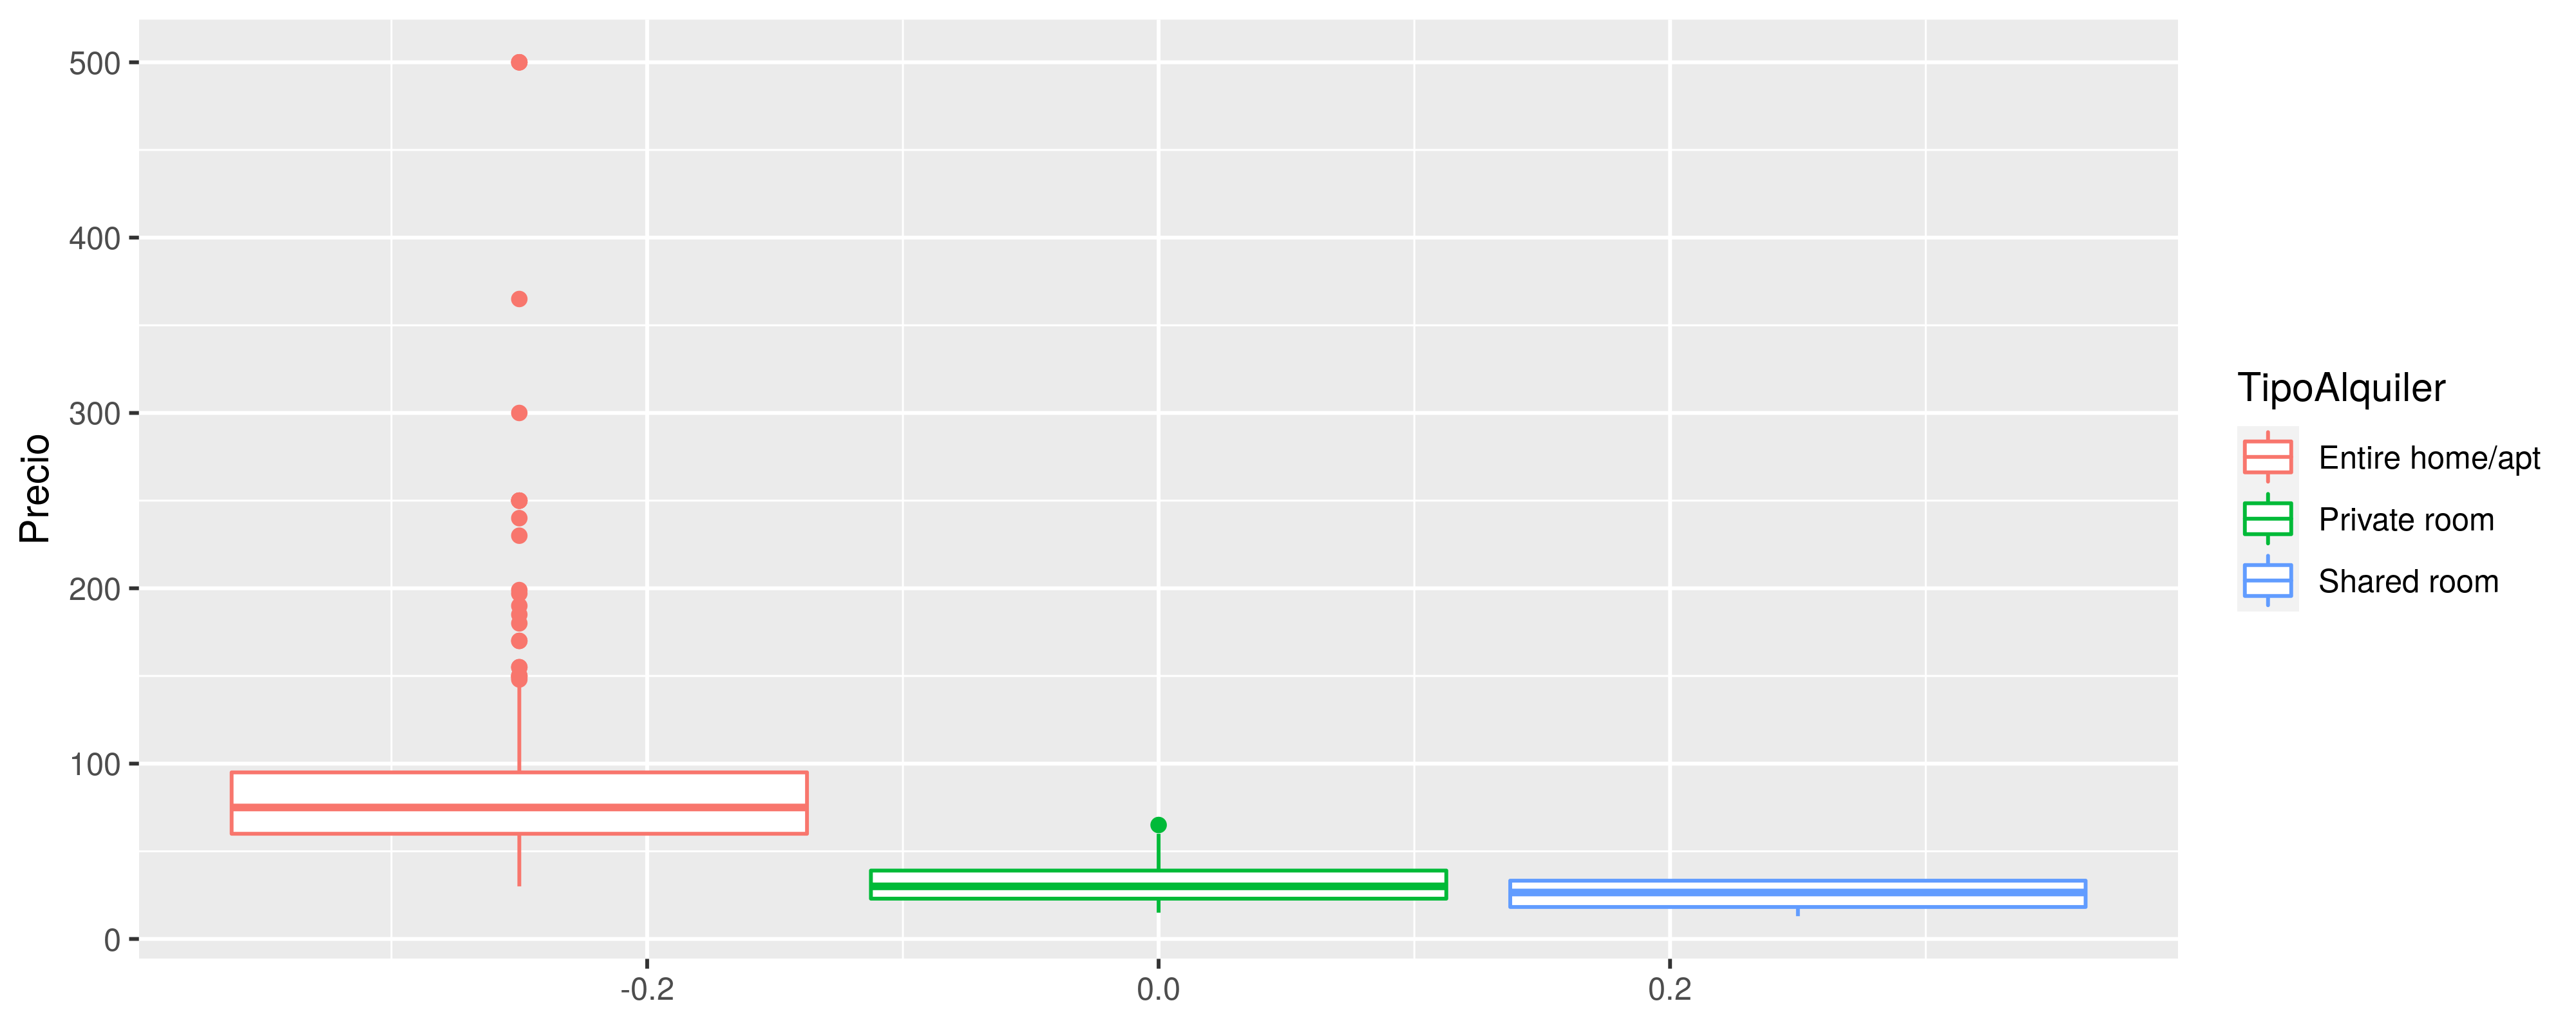

In [1551]:
library(ggplot2)
airbnbgg<-airbnbN
airbnbgg<-na.omit(airbnbgg)
ggplot(data=airbnbgg, aes(y=Precio, color=TipoAlquiler ))+geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [1552]:
airbnb_entire<-airbnbN%>%filter(airbnbN$TipoAlquiler=="Entire home/apt")
airbnb_entire


CodigoPostal Barrio               TipoPropiedad TipoAlquiler   
1    28004        Universidad          Apartment     Entire home/apt
2    28004        Universidad          Apartment     Entire home/apt
3    28004        Universidad          Loft          Entire home/apt
4    28015        Universidad          Apartment     Entire home/apt
5    28004        Universidad          Apartment     Entire home/apt
6    28004        Universidad          Apartment     Entire home/apt
7    28015        Universidad          Apartment     Entire home/apt
8    28004        Universidad          Apartment     Entire home/apt
9    28004        Universidad          Apartment     Entire home/apt
10   28013        Sol                  Apartment     Entire home/apt
11   28013        Sol                  Condominium   Entire home/apt
12   28013        Sol                  Apartment     Entire home/apt
13   28012        Sol                  Apartment     Entire home/apt
14   28013        Sol                  Apartment     Entire home/apt
15   28013        Sol                  Apartment     Entire home/apt
16   28005        Sol                  Apartment     Entire home/apt
17   28013        Sol                  Apartment     Entire home/apt
18   28012        Sol                  Apartment     Entire home/apt
19   28012        Sol                  Apartment     Entire home/apt
20   28013        Sol                  Apartment     Entire home/apt
21   28014        Sol                  Condominium   Entire home/apt
22   28013        Sol                  Apartment     Entire home/apt
23   28005        Sol                  Apartment     Entire home/apt
24   28005        Imperial             Apartment     Entire home/apt
25   28005        Imperial             Apartment     Entire home/apt
26   28005        Acacias              House         Entire home/apt
27   28013        Sol                  Apartment     Entire home/apt
28   28013        Sol                  Apartment     Entire home/apt
29   28013        Sol                  Apartment     Entire home/apt
30   28013        Sol                  Apartment     Entire home/apt
⋮    ⋮            ⋮                    ⋮             ⋮              
7874 28010        Almagro              Apartment     Entire home/apt
7875 28010        Almagro              Apartment     Entire home/apt
7876 28003        Rios Rosas           Apartment     Entire home/apt
7877 28008        Argüelles            House         Entire home/apt
7878 28008        Argüelles            House         Entire home/apt
7879 28008        Argüelles            Apartment     Entire home/apt
7880 28003        Ciudad Universitaria Loft          Entire home/apt
7881 28038        Numancia             Apartment     Entire home/apt
7882 28023        Aravaca              Condominium   Entire home/apt
7883 28004        Universidad          Other         Entire home/apt
7884 28004        Universidad          Apartment     Entire home/apt
7885 28004        Universidad          Apartment     Entire home/apt
7886 28015        Universidad          Apartment     Entire home/apt
7887 28015        Universidad          Apartment     Entire home/apt
7888 28015        Universidad          Apartment     Entire home/apt
7889 28015        Universidad          Apartment     Entire home/apt
7890 28013        Universidad          Apartment     Entire home/apt
7891 28004        Universidad          Apartment     Entire home/apt
7892 28004        Universidad          Apartment     Entire home/apt
7893 28004        Universidad          Apartment     Entire home/apt
7894 28004        Universidad          Apartment     Entire home/apt
7895 28004        Universidad          Apartment     Entire home/apt
7896 28004        Universidad          Apartment     Entire home/apt
7897 28004        Universidad          Loft          Entire home/apt
7898 28004        Universidad          Apartment     Entire home/apt
7899 28015        Universidad          Apartment     Entire home/apt
790

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [1553]:
#filtramos los barrios que tienen apartamentos enteros de alquiler
airbnb_entire<-airbnb_entire%>%filter(TipoPropiedad=="Apartment")
airbnb_entire

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes
1    28004        Universidad Apartment     Entire home/apt  6          
2    28004        Universidad Apartment     Entire home/apt  3          
3    28015        Universidad Apartment     Entire home/apt  5          
4    28004        Universidad Apartment     Entire home/apt  2          
5    28004        Universidad Apartment     Entire home/apt  3          
6    28015        Universidad Apartment     Entire home/apt  2          
7    28004        Universidad Apartment     Entire home/apt  4          
8    28004        Universidad Apartment     Entire home/apt  4          
9    28013        Sol         Apartment     Entire home/apt  4          
10   28013        Sol         Apartment     Entire home/apt  4          
11   28012        Sol         Apartment     Entire home/apt  6          
12   28013        Sol         Apartment     Entire home/apt  4          
13   28013        Sol         Apartment     Entire home/apt  4          
14   28005        Sol         Apartment     Entire home/apt 10          
15   28013        Sol         Apartment     Entire home/apt  6          
16   28012        Sol         Apartment     Entire home/apt  4          
17   28012        Sol         Apartment     Entire home/apt  4          
18   28013        Sol         Apartment     Entire home/apt  4          
19   28013        Sol         Apartment     Entire home/apt  6          
20   28005        Sol         Apartment     Entire home/apt  8          
21   28005        Imperial    Apartment     Entire home/apt  3          
22   28005        Imperial    Apartment     Entire home/apt  3          
23   28013        Sol         Apartment     Entire home/apt  4          
24   28013        Sol         Apartment     Entire home/apt  6          
25   28013        Sol         Apartment     Entire home/apt  3          
26   28013        Sol         Apartment     Entire home/apt  2          
27   28013        Sol         Apartment     Entire home/apt  3          
28   28012        Sol         Apartment     Entire home/apt  3          
29   28013        Sol         Apartment     Entire home/apt  4          
30   28012        Sol         Apartment     Entire home/apt  4          
⋮    ⋮            ⋮           ⋮             ⋮               ⋮           
6966 28010        Trafalgar   Apartment     Entire home/apt  4          
6967 28010        Trafalgar   Apartment     Entire home/apt  8          
6968 28010        Almagro     Apartment     Entire home/apt  6          
6969 28010        Almagro     Apartment     Entire home/apt  1          
6970 28010        Almagro     Apartment     Entire home/apt  2          
6971 28010        Almagro     Apartment     Entire home/apt  5          
6972 28004        Almagro     Apartment     Entire home/apt  3          
6973 28010        Almagro     Apartment     Entire home/apt  2          
6974 28010        Almagro     Apartment     Entire home/apt  2          
6975 28003        Rios Rosas  Apartment     Entire home/apt  3          
6976 28008        Argüelles   Apartment     Entire home/apt  4          
6977 28038        Numancia    Apartment     Entire home/apt  6          
6978 28004        Universidad Apartment     Entire home/apt  3          
6979 28004        Universidad Apartment     Entire home/apt  2          
6980 28015        Universidad Apartment     Entire home/apt  4          
6981 28015        Universidad Apartment     Entire home/apt  2          
6982 28015        Universidad Apartment     Entire home/apt  5          
6983 28015        Universidad Apartment     Entire home/apt  4          
6984 28013        Universidad Apartment     Entire home/apt  2          
6985 28004        Universidad Apartment     Entire home/apt  4          
6986 28004        Universidad Apartment     Entire home/apt 14          
6987 28004        Universidad Apartment     Entire home/apt  3          
6988 28004        Universidad Apartment     Entire home/apt  4 

In [1554]:
paste("Los 5 Barrios que tienen un mayor número de apartamentos son")
Apto_barrios<-airbnb_entire%>% group_by(Barrio )%>% tally()%>% arrange(desc(n))%>%head(5)
names(Apto_barrios)<-c("Barrio", "numero_Aptos")
Apto_barrios


[1] "Los 5 Barrios que tienen un mayor número de apartamentos son"

Barrio      numero_Aptos
1 Embajadores 1099        
2 Universidad  897        
3 Palacio      684        
4 Sol          648        
5 Cortes       528

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [1555]:
entire_precio<-airbnb_entire%>% group_by(Precio)%>%arrange(desc(Precio))
entire_precio

CodigoPostal Barrio           TipoPropiedad TipoAlquiler    MaxOcupantes
1    28042        Palomas          Apartment     Entire home/apt 16          
2    28007        Pacífico         Apartment     Entire home/apt  8          
3    28001        Recoletos        Apartment     Entire home/apt 10          
4    28004        Justicia         Apartment     Entire home/apt  7          
5    28001        Recoletos        Apartment     Entire home/apt  9          
6    28001        Recoletos        Apartment     Entire home/apt  7          
7    28001        Recoletos        Apartment     Entire home/apt  7          
8    28014        Cortes           Apartment     Entire home/apt  6          
9    28001        Recoletos        Apartment     Entire home/apt  7          
10   28012        Sol              Apartment     Entire home/apt 16          
11   28014        Jerónimos        Apartment     Entire home/apt  7          
12   28001        Recoletos        Apartment     Entire home/apt  6          
13   28004        Justicia         Apartment     Entire home/apt 12          
14   28019        San Isidro       Apartment     Entire home/apt  2          
15   28004        Justicia         Apartment     Entire home/apt 14          
16   28014        Cortes           Apartment     Entire home/apt  6          
17   28004        Justicia         Apartment     Entire home/apt  4          
18   28012        Embajadores      Apartment     Entire home/apt  5          
19   28004        Justicia         Apartment     Entire home/apt  6          
20   28004        Justicia         Apartment     Entire home/apt  6          
21   28014        Cortes           Apartment     Entire home/apt  6          
22   28004        Trafalgar        Apartment     Entire home/apt 10          
23   28004        Universidad      Apartment     Entire home/apt  6          
24   28001        Recoletos        Apartment     Entire home/apt  6          
25   28012        Cortes           Apartment     Entire home/apt 16          
26   28012        Cortes           Apartment     Entire home/apt 16          
27   28012        Cortes           Apartment     Entire home/apt 16          
28   28006        Castellana       Apartment     Entire home/apt  6          
29   28036        Nueva España     Apartment     Entire home/apt  7          
30   28013        Palacio          Apartment     Entire home/apt  4          
⋮    ⋮            ⋮                ⋮             ⋮               ⋮           
6966 28004        Universidad      Apartment     Entire home/apt 2           
6967 28039        Bellas Vistas    Apartment     Entire home/apt 2           
6968 28015        Universidad      Apartment     Entire home/apt 1           
6969 28012        Embajadores      Apartment     Entire home/apt 2           
6970 28011        Puerta del Angel Apartment     Entire home/apt 2           
6971 28004        Universidad      Apartment     Entire home/apt 4           
6972 28011        Puerta del Angel Apartment     Entire home/apt 2           
6973 28045        Delicias         Apartment     Entire home/apt 3           
6974 28012        Embajadores      Apartment     Entire home/apt 2           
6975 28004        Universidad      Apartment     Entire home/apt 2           
6976 28024        Aluche           Apartment     Entire home/apt 2           
6977 28004        Justicia         Apartment     Entire home/apt 5           
6978 28017        Ventas           Apartment     Entire home/apt 4           
6979 28045        Palos de Moguer  Apartment     Entire home/apt 2           
6980    NA        Buenavista       Apartment     Entire home/apt 3           
6981 28041        San Fermín       Apartment     Entire home/apt 4           
6982 28017        Ventas           Apartment     Entire home/apt 2           
6983 28019        Comillas         Apartment     Entire home/apt 2           
6984    NA        San Diego        Apartment     Entire home/apt 2           
6985 28008        Casa de C

In [1556]:
mean_Barrio <- aggregate(Precio~Barrio, airbnb_entire, mean, na.rm=TRUE)%>% arrange(desc(Precio))
mean_Barrio

Barrio                      Precio   
1   Palomas                     459.50000
2   Fuentelareina               280.00000
3   Recoletos                   165.53279
4   Casco Histórico de Barajas  157.00000
5   Castellana                  140.68182
6   Alameda de Osuna            140.00000
7   Jerónimos                   132.10909
8   Goya                        112.16393
9   Nueva España                104.47222
10  Ibiza                       102.80000
11  Vinateros                   102.50000
12  Sol                         100.99691
13  Almagro                      99.86207
14  Mirasierra                   99.00000
15  Justicia                     98.82099
16  Almendrales                  97.16667
17  Trafalgar                    94.07389
18  Cortes                       93.50758
19  Casa de Campo                93.36111
20  Estrella                     92.66667
21  Palacio                      92.63982
22  Vallehermoso                 92.39394
23  Hispanoamérica               91.65909
24  Lista                        90.30000
25  Niño Jesús                   89.23077
26  Pacífico                     89.17647
27  Ciudad Universitaria         89.12500
28  Argüelles                    88.14062
29  Gaztambide                   87.92727
30  Legazpi                      86.75000
⋮   ⋮                           ⋮        
87  Colina                      57.20000 
88  Casco Histórico de Vallecas 57.08333 
89  San Cristobal               56.50000 
90  Pinar del Rey               56.00000 
91  Aluche                      55.88889 
92  Zofío                       55.66667 
93  Chopera                     55.57143 
94  Portazgo                    55.00000 
95  Aguilas                     54.50000 
96  Valdezarza                  53.33333 
97  Fontarrón                   51.80000 
98  Bellas Vistas               50.86486 
99  Berruguete                  50.48148 
100 San Andrés                  50.33333 
101 Los Rosales                 50.00000 
102 Marroquina                  50.00000 
103 Ventas                      49.79167 
104 Opañel                      49.40000 
105 Palomeras Bajas             49.40000 
106 Campamento                  48.12500 
107 Pavones                     48.00000 
108 Santa Eugenia               47.00000 
109 Abrantes                    46.00000 
110 Orcasur                     45.00000 
111 San Diego                   44.33333 
112 Butarque                    42.00000 
113 Hellín                      42.00000 
114 Aeropuerto                  38.00000 
115 Ambroz                      34.50000 
116 Palomeras Sureste           31.50000

In [1572]:
paste("Los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son" )
mean_Barrio <- aggregate(Precio~Barrio, airbnb_entire, mean, na.rm=TRUE)%>% arrange(desc(Precio))
mean_Barrio%>%head(5)

[1] "Los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son"

Barrio                     Precio  
1 Palomas                    459.5000
2 Fuentelareina              280.0000
3 Recoletos                  165.5328
4 Casco Histórico de Barajas 157.0000
5 Castellana                 140.6818

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [1569]:
df_barrio<-as.data.frame(table(airbnbN$Barrio))
names(df_barrio)<-c("Barrio", "Frecuencia")
df_barrio


Barrio                       Frecuencia
1   Abrantes                      18       
2   Acacias                      145       
3   Adelfas                       51       
4   Aeropuerto                     6       
5   Aguilas                       15       
6   Alameda de Osuna              24       
7   Almagro                      155       
8   Almenara                      62       
9   Almendrales                   45       
10  Aluche                        45       
11  Ambroz                        12       
12  Amposta                        5       
13  Apostol Santiago              15       
14  Arapiles                     182       
15  Aravaca                       16       
16  Arcos                         18       
17  Argüelles                    264       
18  Atocha                        18       
19  Bellas Vistas                 79       
20  Berruguete                    67       
21  Buenavista                    22       
22  Butarque                       6       
23  Campamento                    22       
24  Canillas                      42       
25  Canillejas                     7       
26  Cármenes                      30       
27  Casa de Campo                 75       
28  Casco Histórico de Barajas    28       
29  Casco Histórico de Vallecas   40       
30  Casco Histórico de Vicálvaro  20       
⋮   ⋮                            ⋮         
96  Puerta del Angel              199      
97  Quintana                       45      
98  Recoletos                     172      
99  Rejas                          20      
100 Rios Rosas                    104      
101 Rosas                           4      
102 Salvador                       13      
103 San Andrés                     21      
104 San Cristobal                   8      
105 San Diego                      80      
106 San Fermín                     32      
107 San Isidro                     85      
108 San Juan Bautista              26      
109 San Pascual                    18      
110 Santa Eugenia                   4      
111 Simancas                       45      
112 Sol                           940      
113 Timón                          16      
114 Trafalgar                     315      
115 Universidad                  1358      
116 Valdeacederas                  48      
117 Valdefuentes                   55      
118 Valdemarín                      4      
119 Valdezarza                     20      
120 Vallehermoso                   60      
121 Valverde                       45      
122 Ventas                         78      
123 Vinateros                      17      
124 Vista Alegre                   74      
125 Zofío                           9

In [1573]:
Apto_Barrio <-merge (df_barrio,mean_Barrio,by="Barrio")
Apto_Barrio

Barrio                       Frecuencia Precio   
1   Abrantes                      18         46.00000
2   Acacias                      145         68.53571
3   Adelfas                       51         70.48148
4   Aeropuerto                     6         38.00000
5   Aguilas                       15         54.50000
6   Alameda de Osuna              24        140.00000
7   Almagro                      155         99.86207
8   Almenara                      62         66.81818
9   Almendrales                   45         97.16667
10  Aluche                        45         55.88889
11  Ambroz                        12         34.50000
12  Apostol Santiago              15         73.25000
13  Arapiles                     182         70.04348
14  Aravaca                       16         66.00000
15  Arcos                         18         83.50000
16  Argüelles                    264         88.14062
17  Atocha                        18         60.57143
18  Bellas Vistas                 79         50.86486
19  Berruguete                    67         50.48148
20  Buenavista                    22         60.66667
21  Butarque                       6         42.00000
22  Campamento                    22         48.12500
23  Canillas                      42         80.20000
24  Cármenes                      30         78.80000
25  Casa de Campo                 75         93.36111
26  Casco Histórico de Barajas    28        157.00000
27  Casco Histórico de Vallecas   40         57.08333
28  Casco Histórico de Vicálvaro  20         82.83333
29  Castellana                    97        140.68182
30  Castilla                      26         68.85000
⋮   ⋮                            ⋮          ⋮        
87  Puerta Bonita                  38        78.45455
88  Puerta del Angel              199        58.64615
89  Quintana                       45        60.83333
90  Recoletos                     172       165.53279
91  Rejas                          20        64.66667
92  Rios Rosas                    104        84.53846
93  Salvador                       13        68.00000
94  San Andrés                     21        50.33333
95  San Cristobal                   8        56.50000
96  San Diego                      80        44.33333
97  San Fermín                     32        59.66667
98  San Isidro                     85        79.03704
99  San Juan Bautista              26        72.00000
100 San Pascual                    18        78.40000
101 Santa Eugenia                   4        47.00000
102 Simancas                       45        62.50000
103 Sol                           940       100.99691
104 Timón                          16        72.20000
105 Trafalgar                     315        94.07389
106 Universidad                  1358        79.56585
107 Valdeacederas                  48        60.89474
108 Valdefuentes                   55        79.50000
109 Valdemarín                      4        70.50000
110 Valdezarza                     20        53.33333
111 Vallehermoso                   60        92.39394
112 Valverde                       45        76.83333
113 Ventas                         78        49.79167
114 Vinateros                      17       102.50000
115 Vista Alegre                   74        62.90000
116 Zofío                           9        55.66667

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [1574]:
paste("Los 5 barrios con mayor precio con mas de 100 entradas de alquiler son:")
Precio_Entradas<-filter(Apto_Barrio, Frecuencia>100 )%>% arrange(desc(Precio))%>%head(5)
Precio_Entradas

[1] "Los 5 barrios con mayor precio con mas de 100 entradas de alquiler son:"

Barrio    Frecuencia Precio   
1 Recoletos 172        165.53279
2 Goya      229        112.16393
3 Ibiza     105        102.80000
4 Sol       940        100.99691
5 Almagro   155         99.86207

In [1575]:
Precio_Entradas

Barrio    Frecuencia Precio   
1 Recoletos 172        165.53279
2 Goya      229        112.16393
3 Ibiza     105        102.80000
4 Sol       940        100.99691
5 Almagro   155         99.86207

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [1418]:
#media de metros cuadrados 
#Ibiza no aparece porque en ninguna de sus entradas tiene pies cuadrados por lo tanto NA en Mtscuadrados
df_metros <-airbnbN%>%select(Barrio, MetrosCuadrados)
df_metros<- as.data.frame(aggregate(MetrosCuadrados~Barrio, airbnb_entire, mean, na.rm=TRUE))
metros<-merge (Precio_Entradas,df_metros,by="Barrio")
metros


Barrio    Frecuencia Precio   MetrosCuadrados
1 Almagro   155        109.1856  0.00000       
2 Goya      229        111.3380 51.68504       
3 Recoletos 172        161.9254 26.66316       
4 Sol       940        100.7504 45.61692

In [1417]:
dim(metros)

[1] 4 4

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


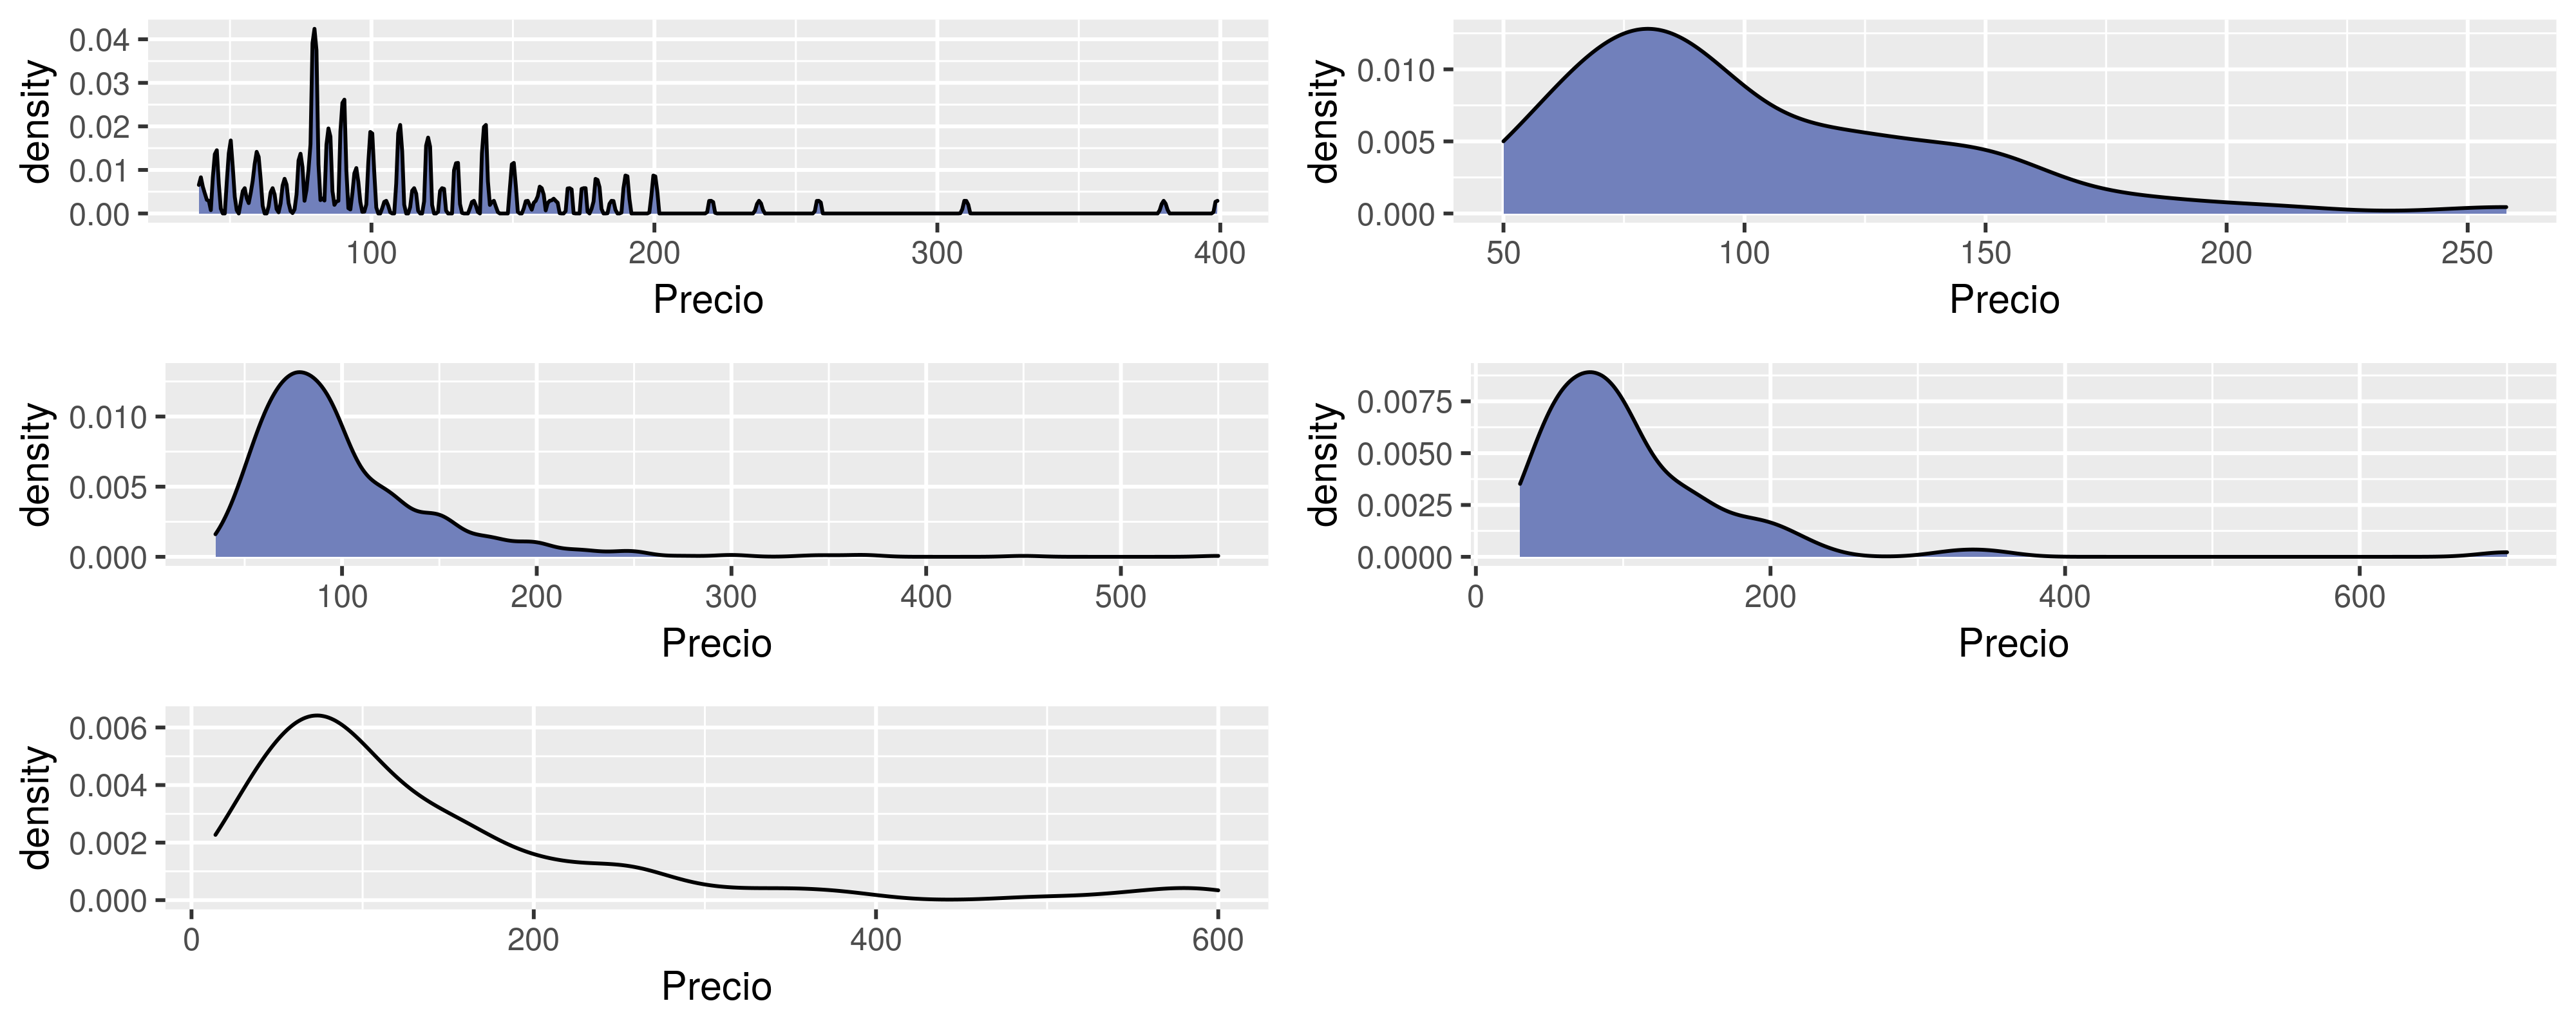

In [1388]:
gridExtra::grid.arrange(density_goya,  density_Ibiza, density_Sol, density_Almagro, density_recoletos)

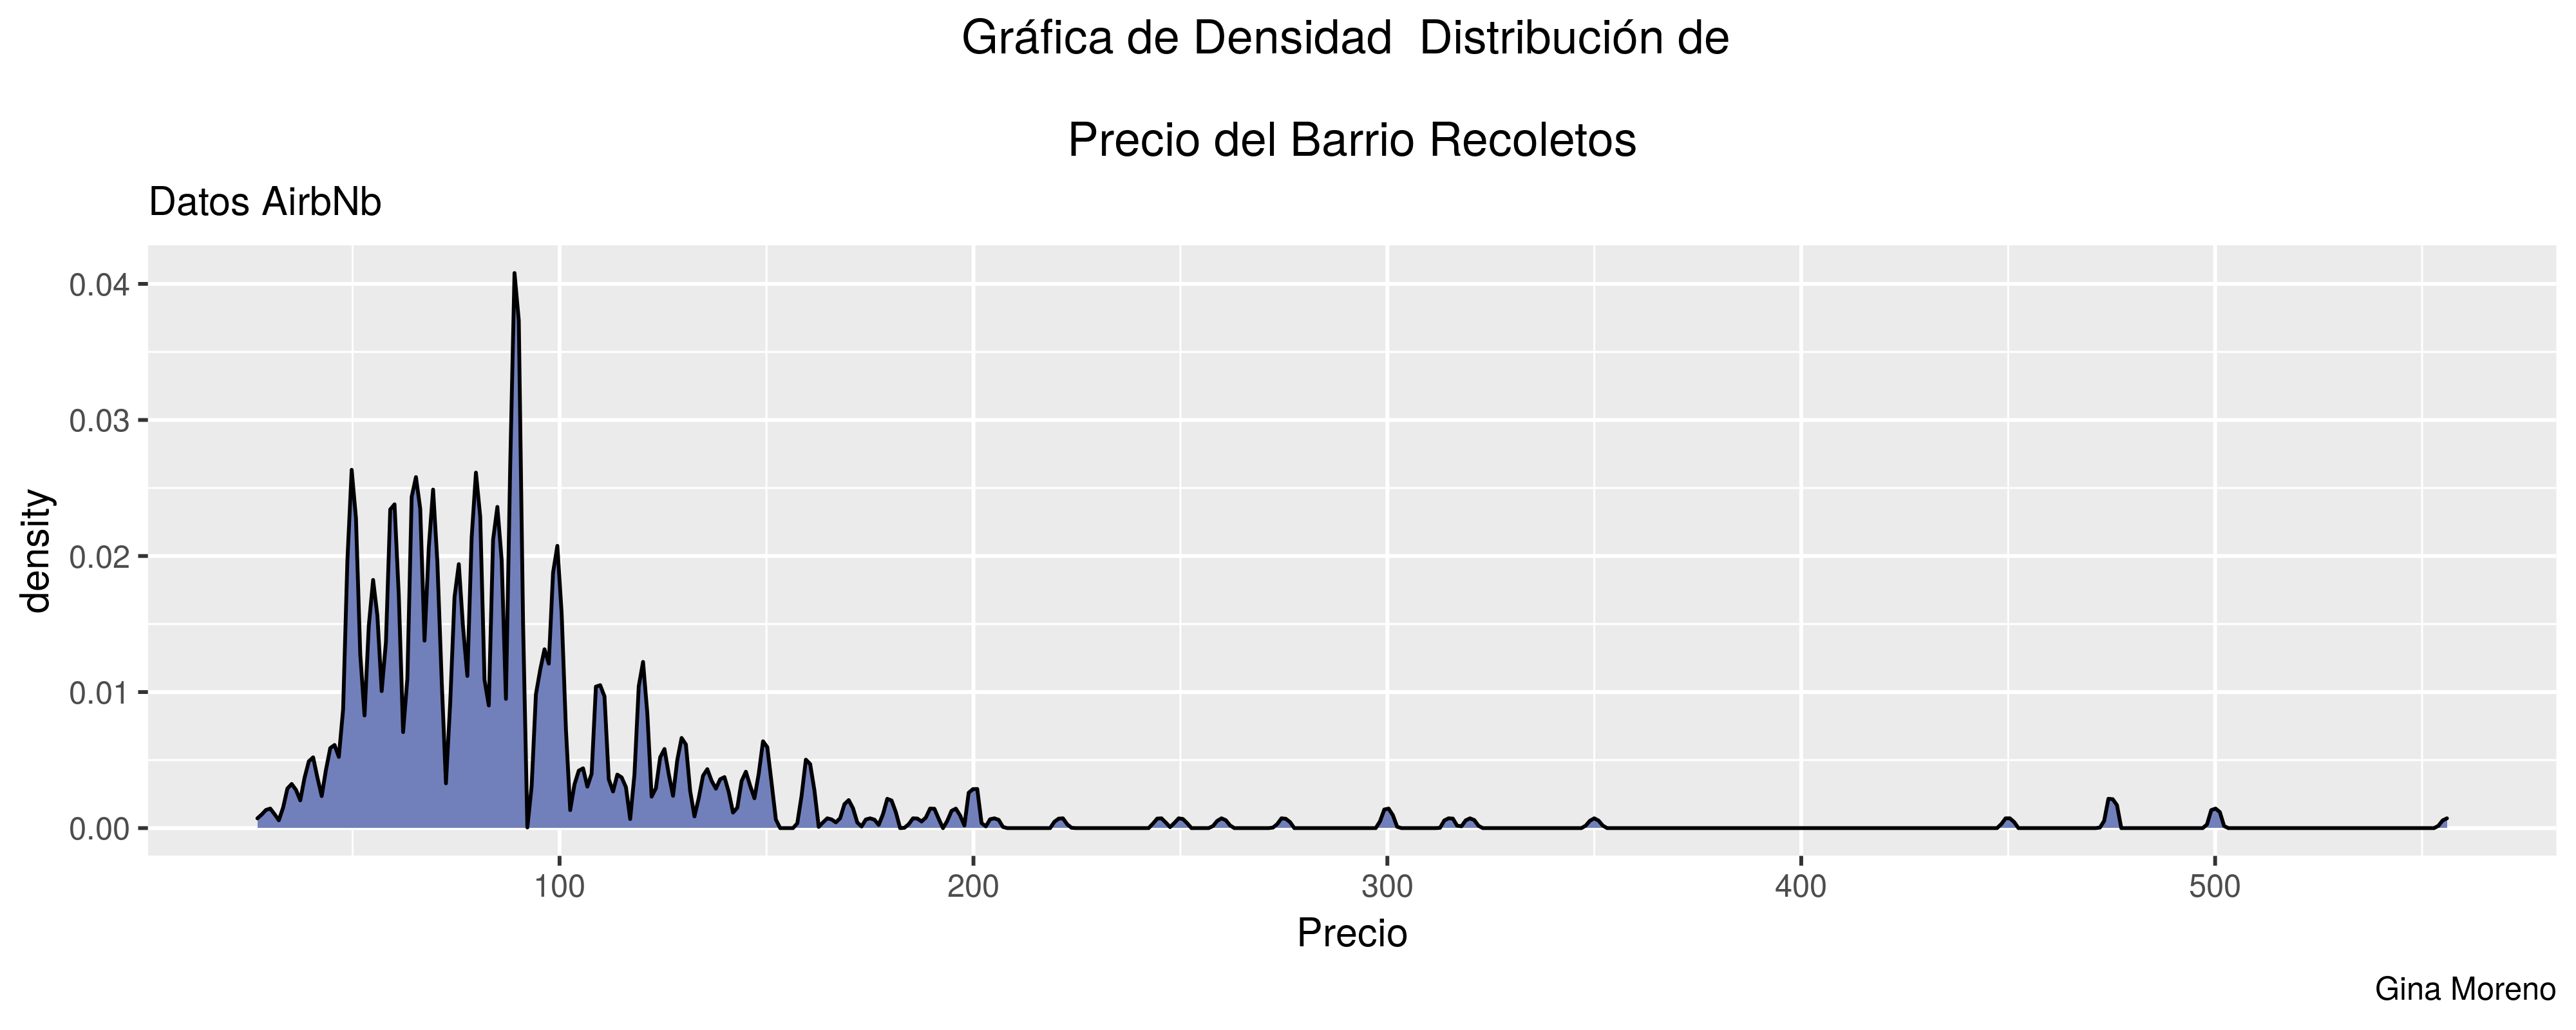

In [1280]:
Recoletos<-filter(airbnb_entire, Barrio=="Recoletos" )
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
density_Recoletos <- ggplot(data=Cortes,aes(x=Precio))+geom_density(fill="#7180BB",
color="#010104", kernel="rectangular", bw=0.7)
density_Recoletos+
labs(title="Gráfica de Densidad  Distribución de \n 
Precio del Barrio Recoletos", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))



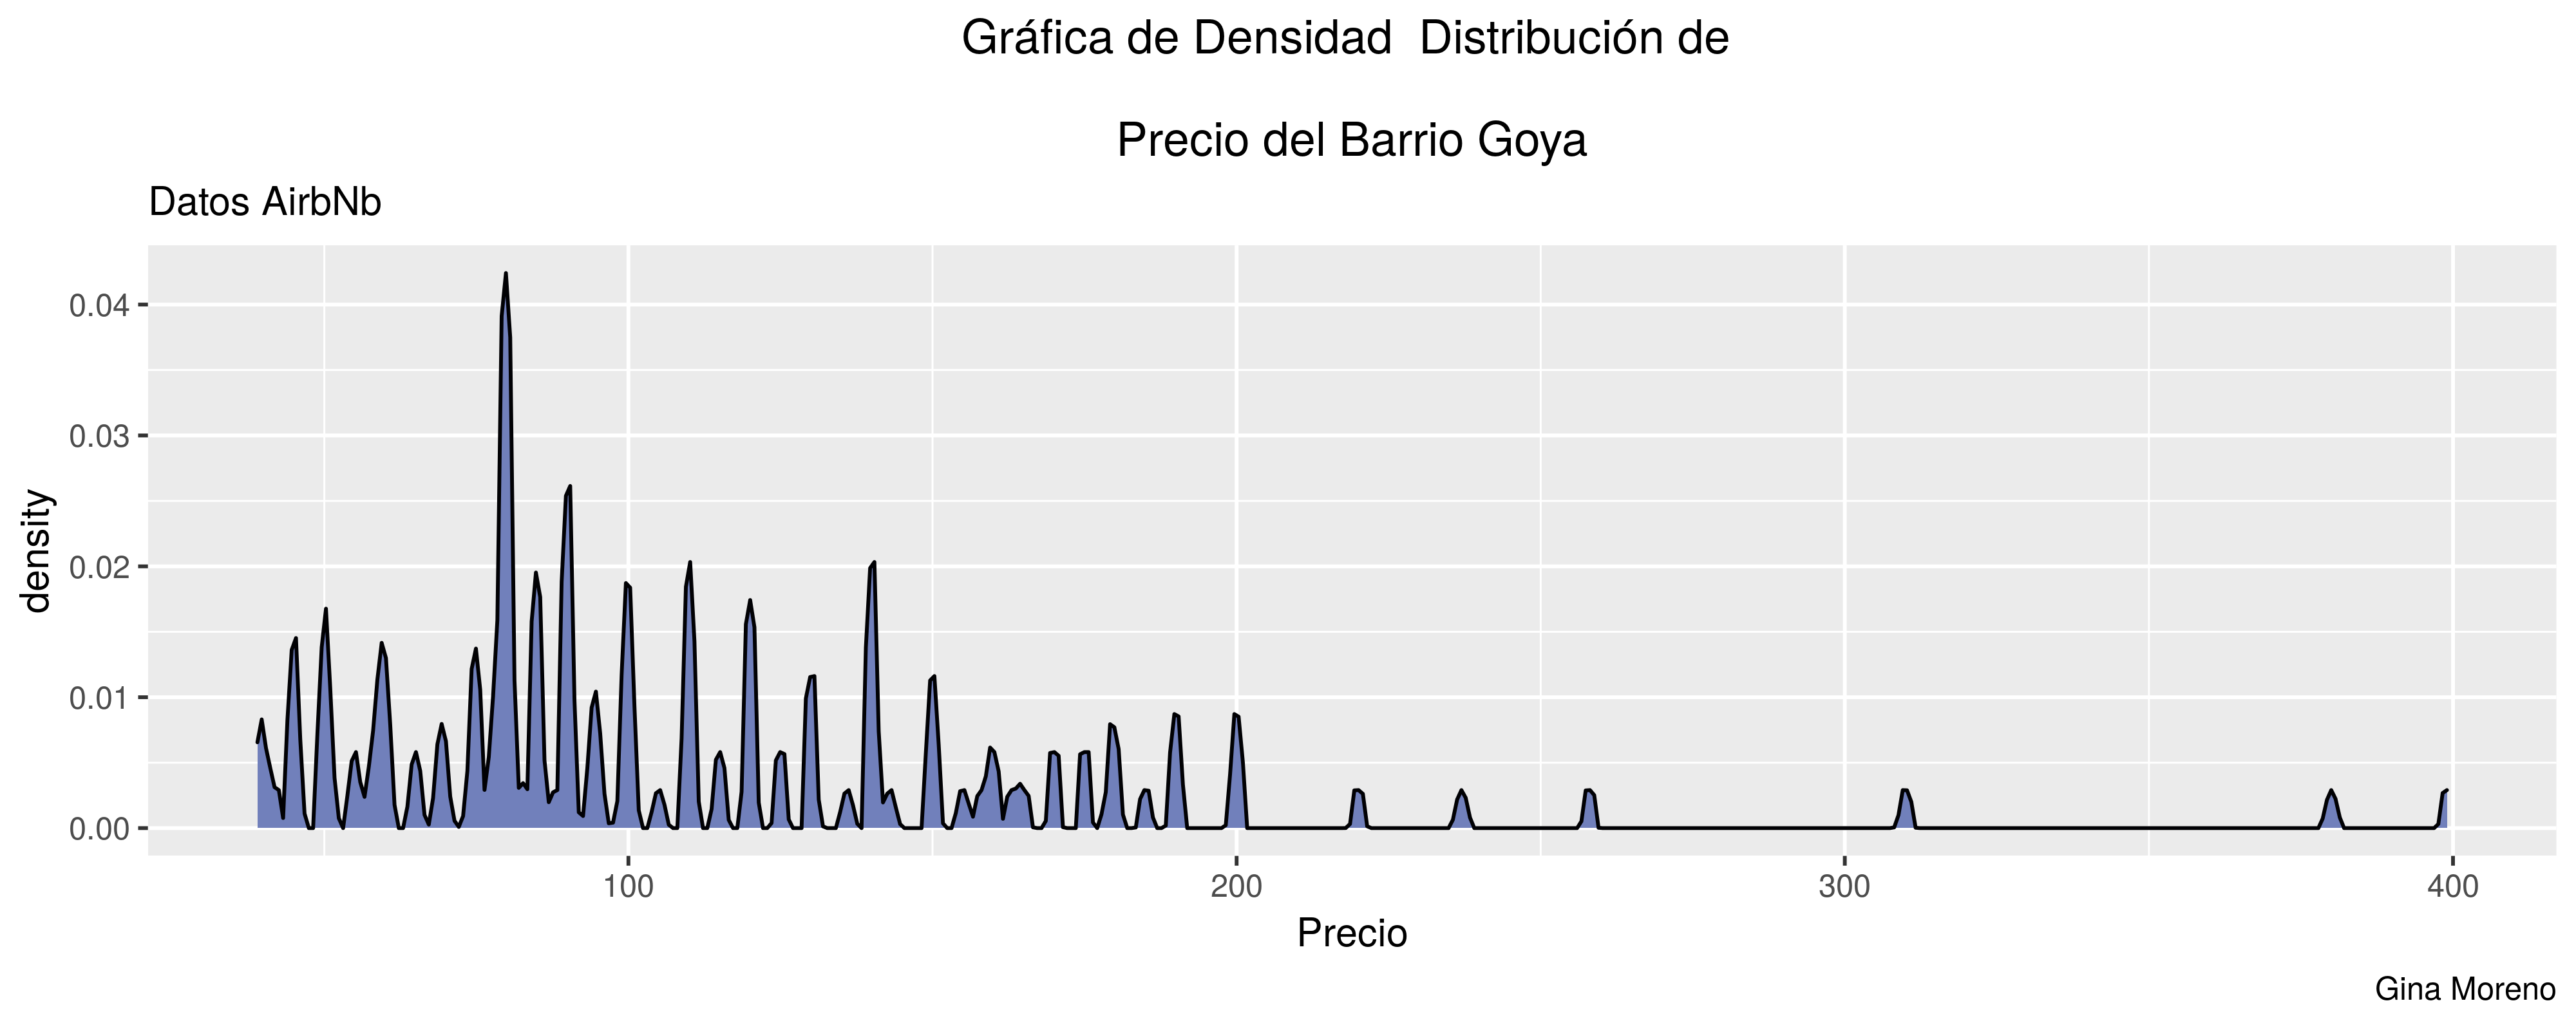

In [1382]:
Goya<-filter(airbnb_entire, Barrio=="Goya" )
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
density_goya <- ggplot(data=Goya,aes(x=Precio))+geom_density(fill="#7180BB", color="#010104",
       kernel="rectangular", bw=0.7 )
density_goya+
labs(title="Gráfica de Densidad  Distribución de \n 
Precio del Barrio Goya", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))
    

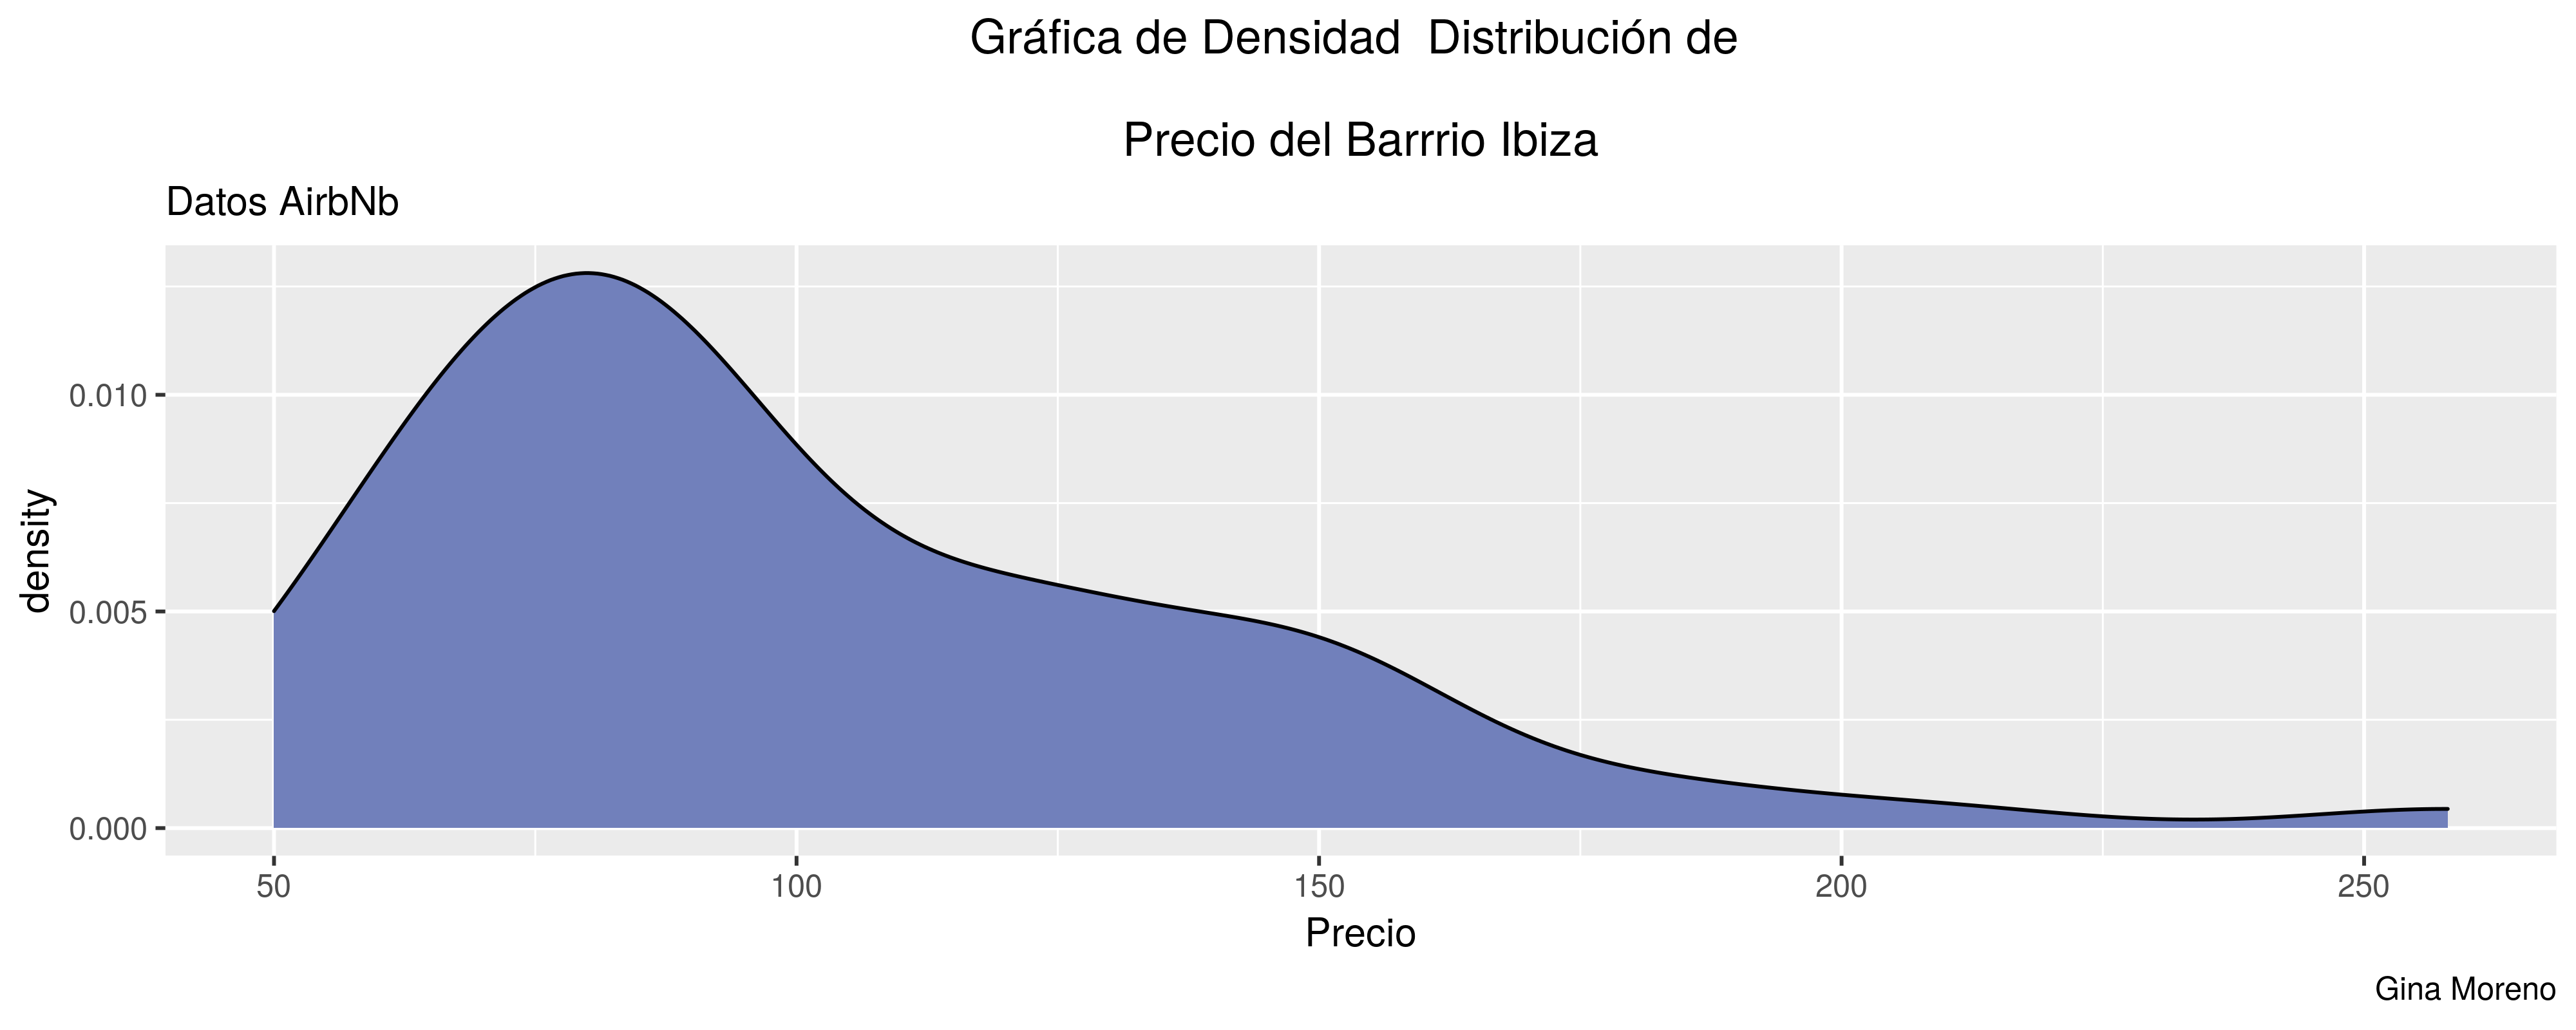

In [1384]:
Ibiza<-filter(airbnb_entire, Barrio=="Ibiza" )
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
density_Ibiza <- ggplot(data=Ibiza,aes(x=Precio))+geom_density(fill="#7180BB", color="#010104")
density_Ibiza+
labs(title="Gráfica de Densidad  Distribución de \n 
Precio del Barrrio Ibiza", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))


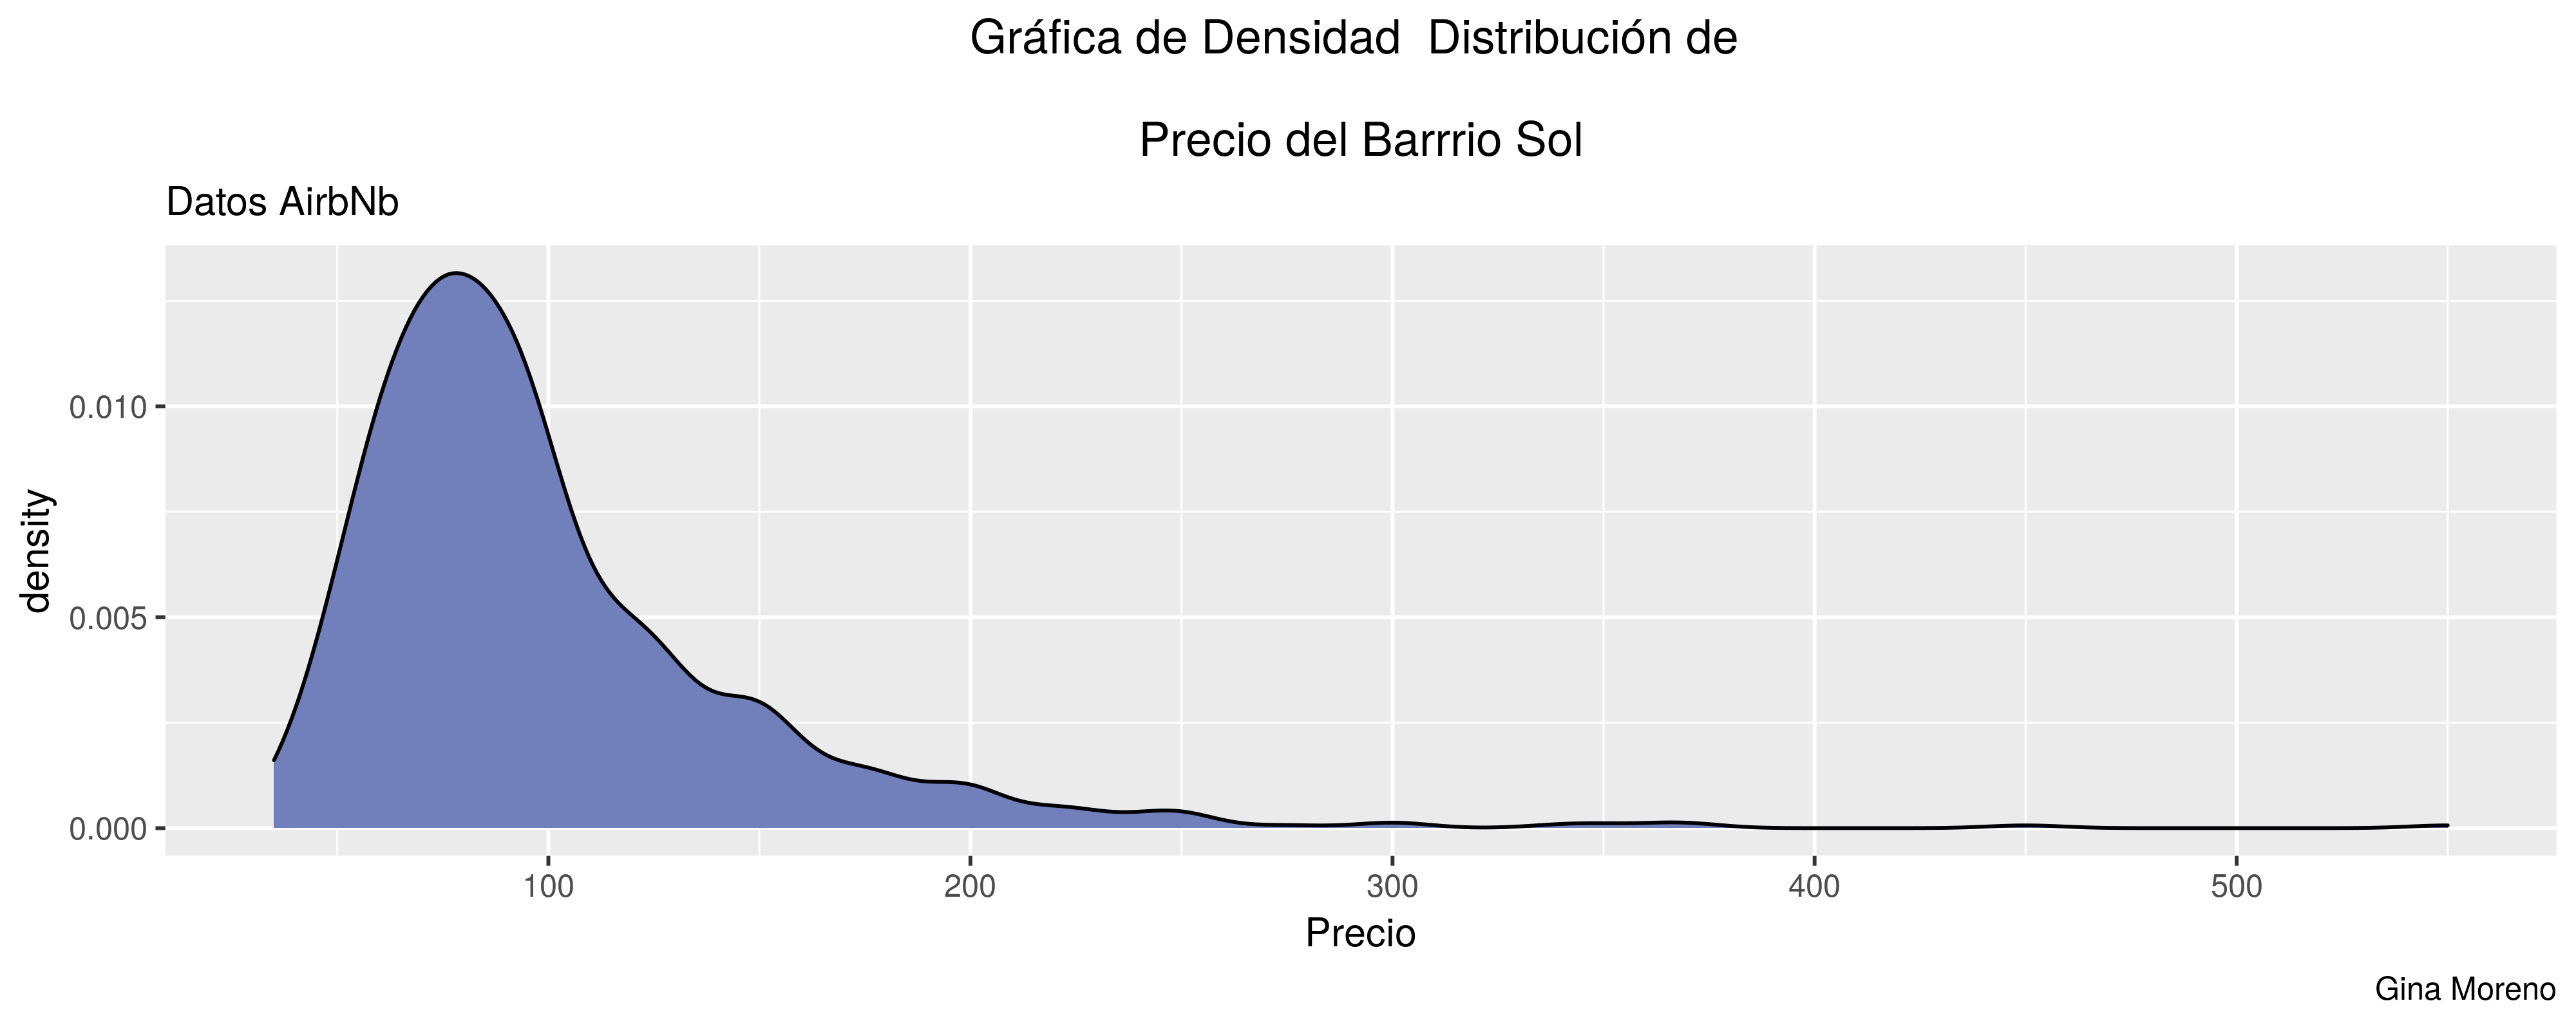

In [1273]:
Sol<-filter(airbnb_entire, Barrio=="Sol" )
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
density_Sol <- ggplot(data=Sol,aes(x=Precio))+geom_density(fill="#7180BB", color="#010104")
density_Sol+
labs(title="Gráfica de Densidad  Distribución de \n 
Precio del Barrrio Sol", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

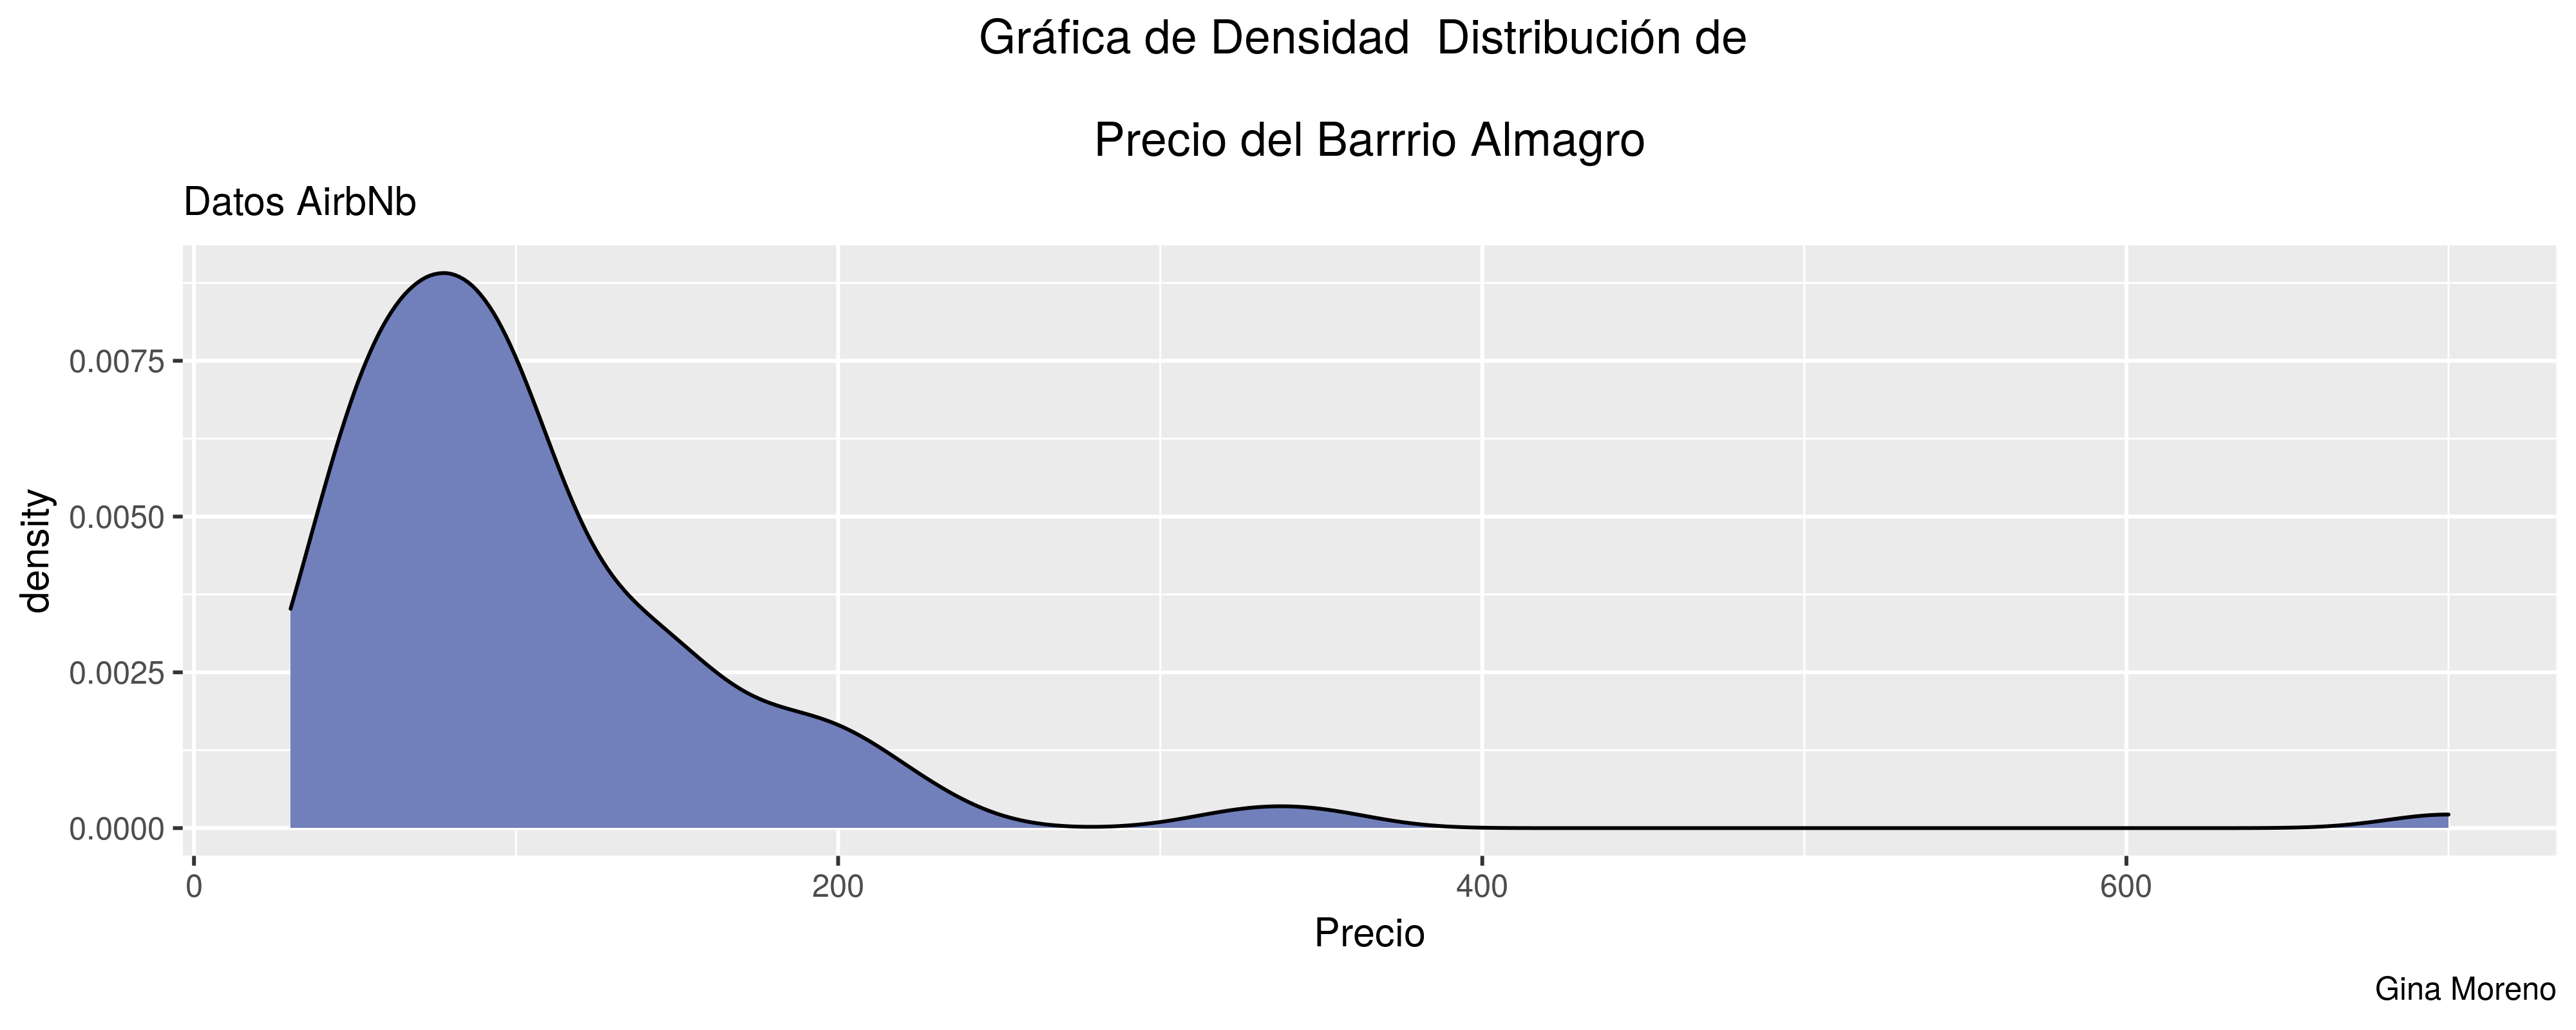

In [1272]:
Almagro<-filter(airbnb_entire, Barrio=="Almagro" )
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
density_Almagro <- ggplot(data=Almagro,aes(x=Precio))+geom_density(fill="#7180BB", color="#010104")
density_Almagro+
labs(title="Gráfica de Densidad  Distribución de \n 
Precio del Barrrio Almagro", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

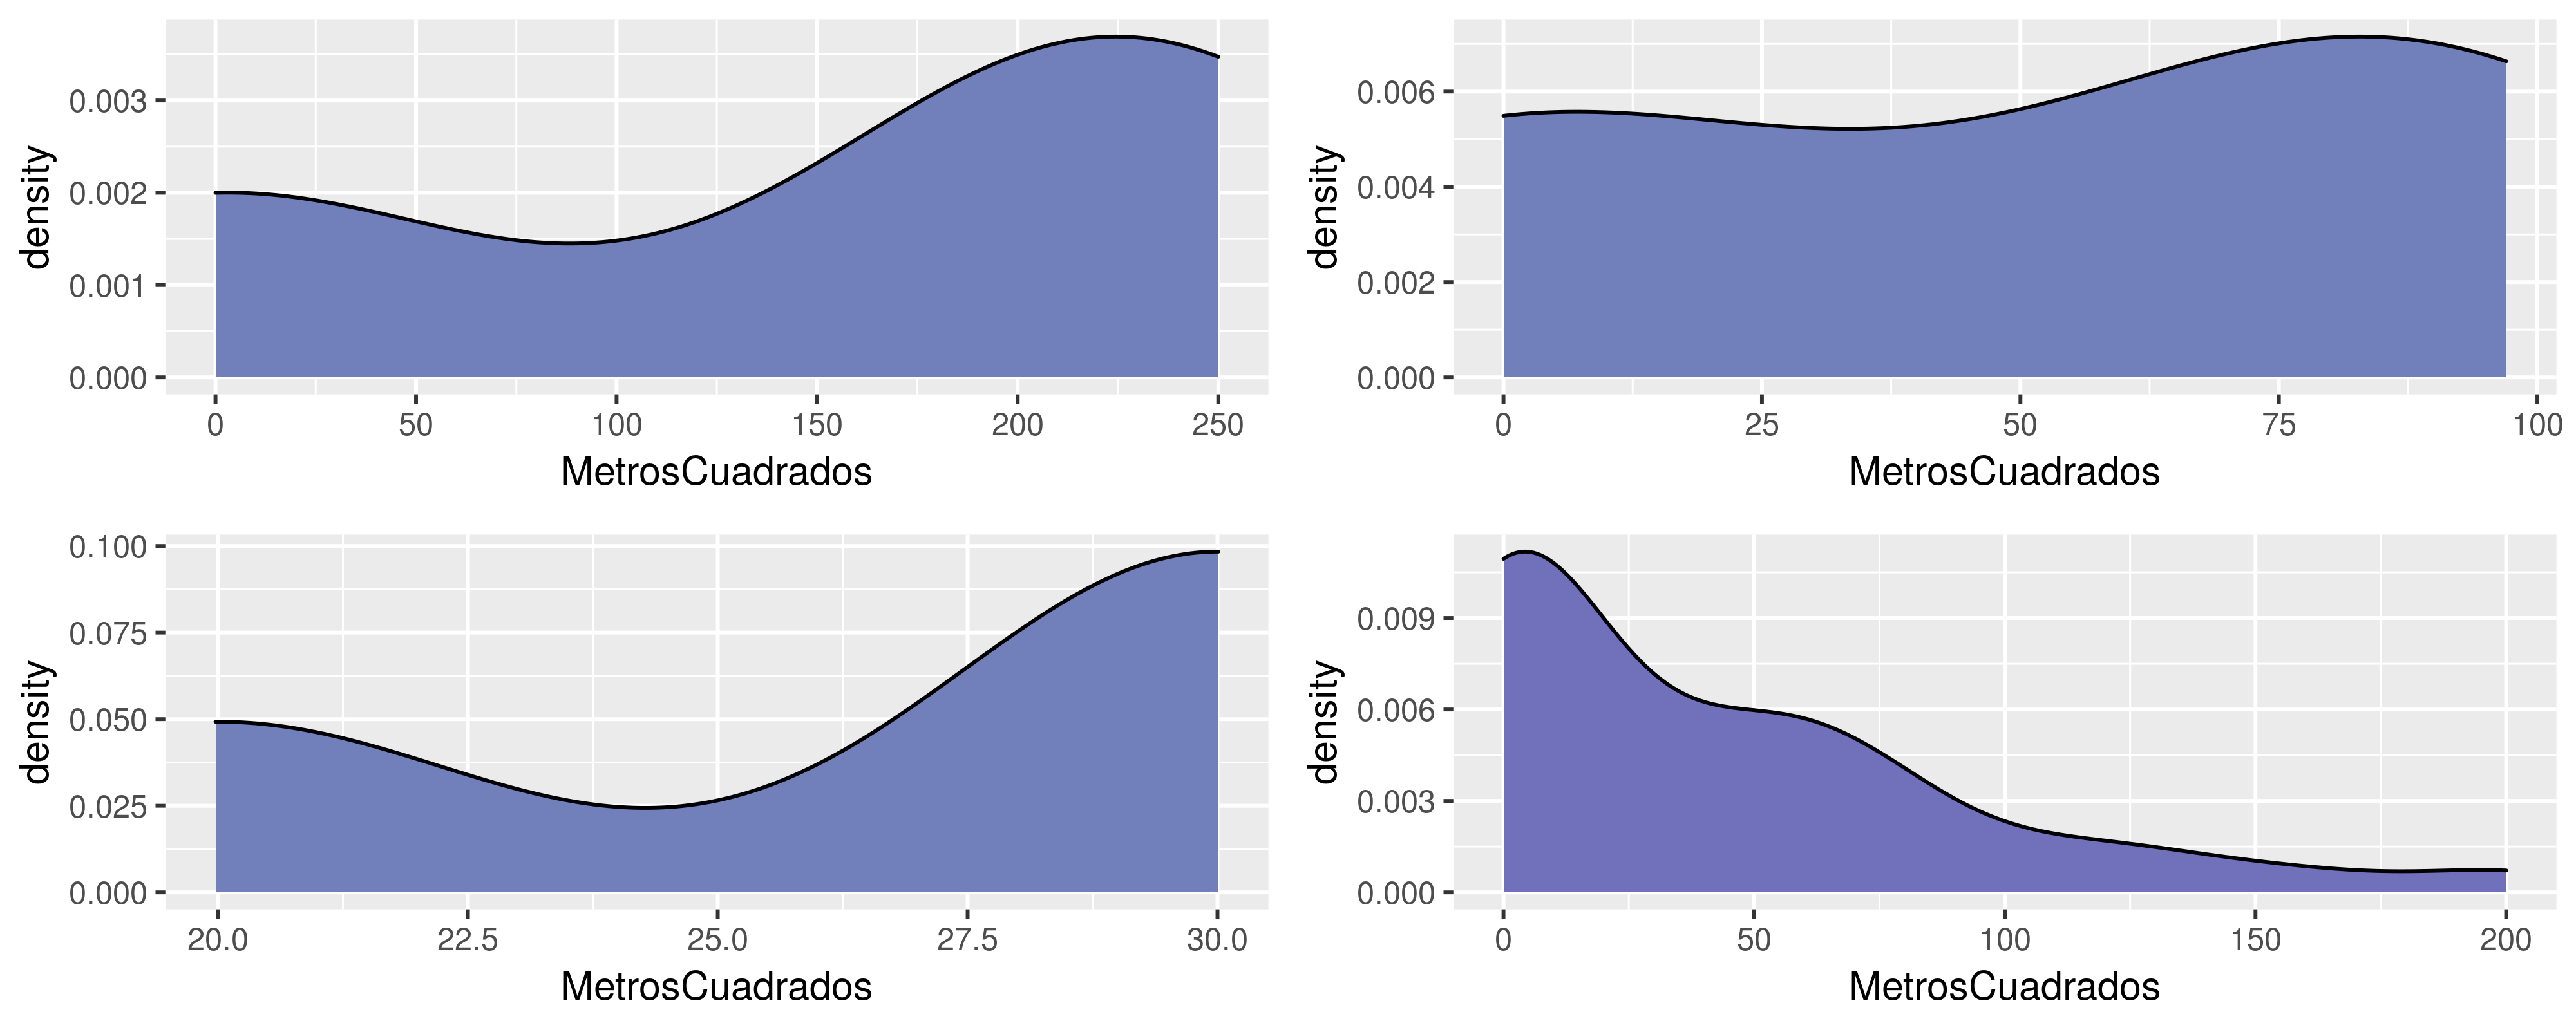

In [1389]:
gridExtra::grid.arrange(Almagro_Apto, Goya_Apto, Recoletos_Apto, Sol_Apto)

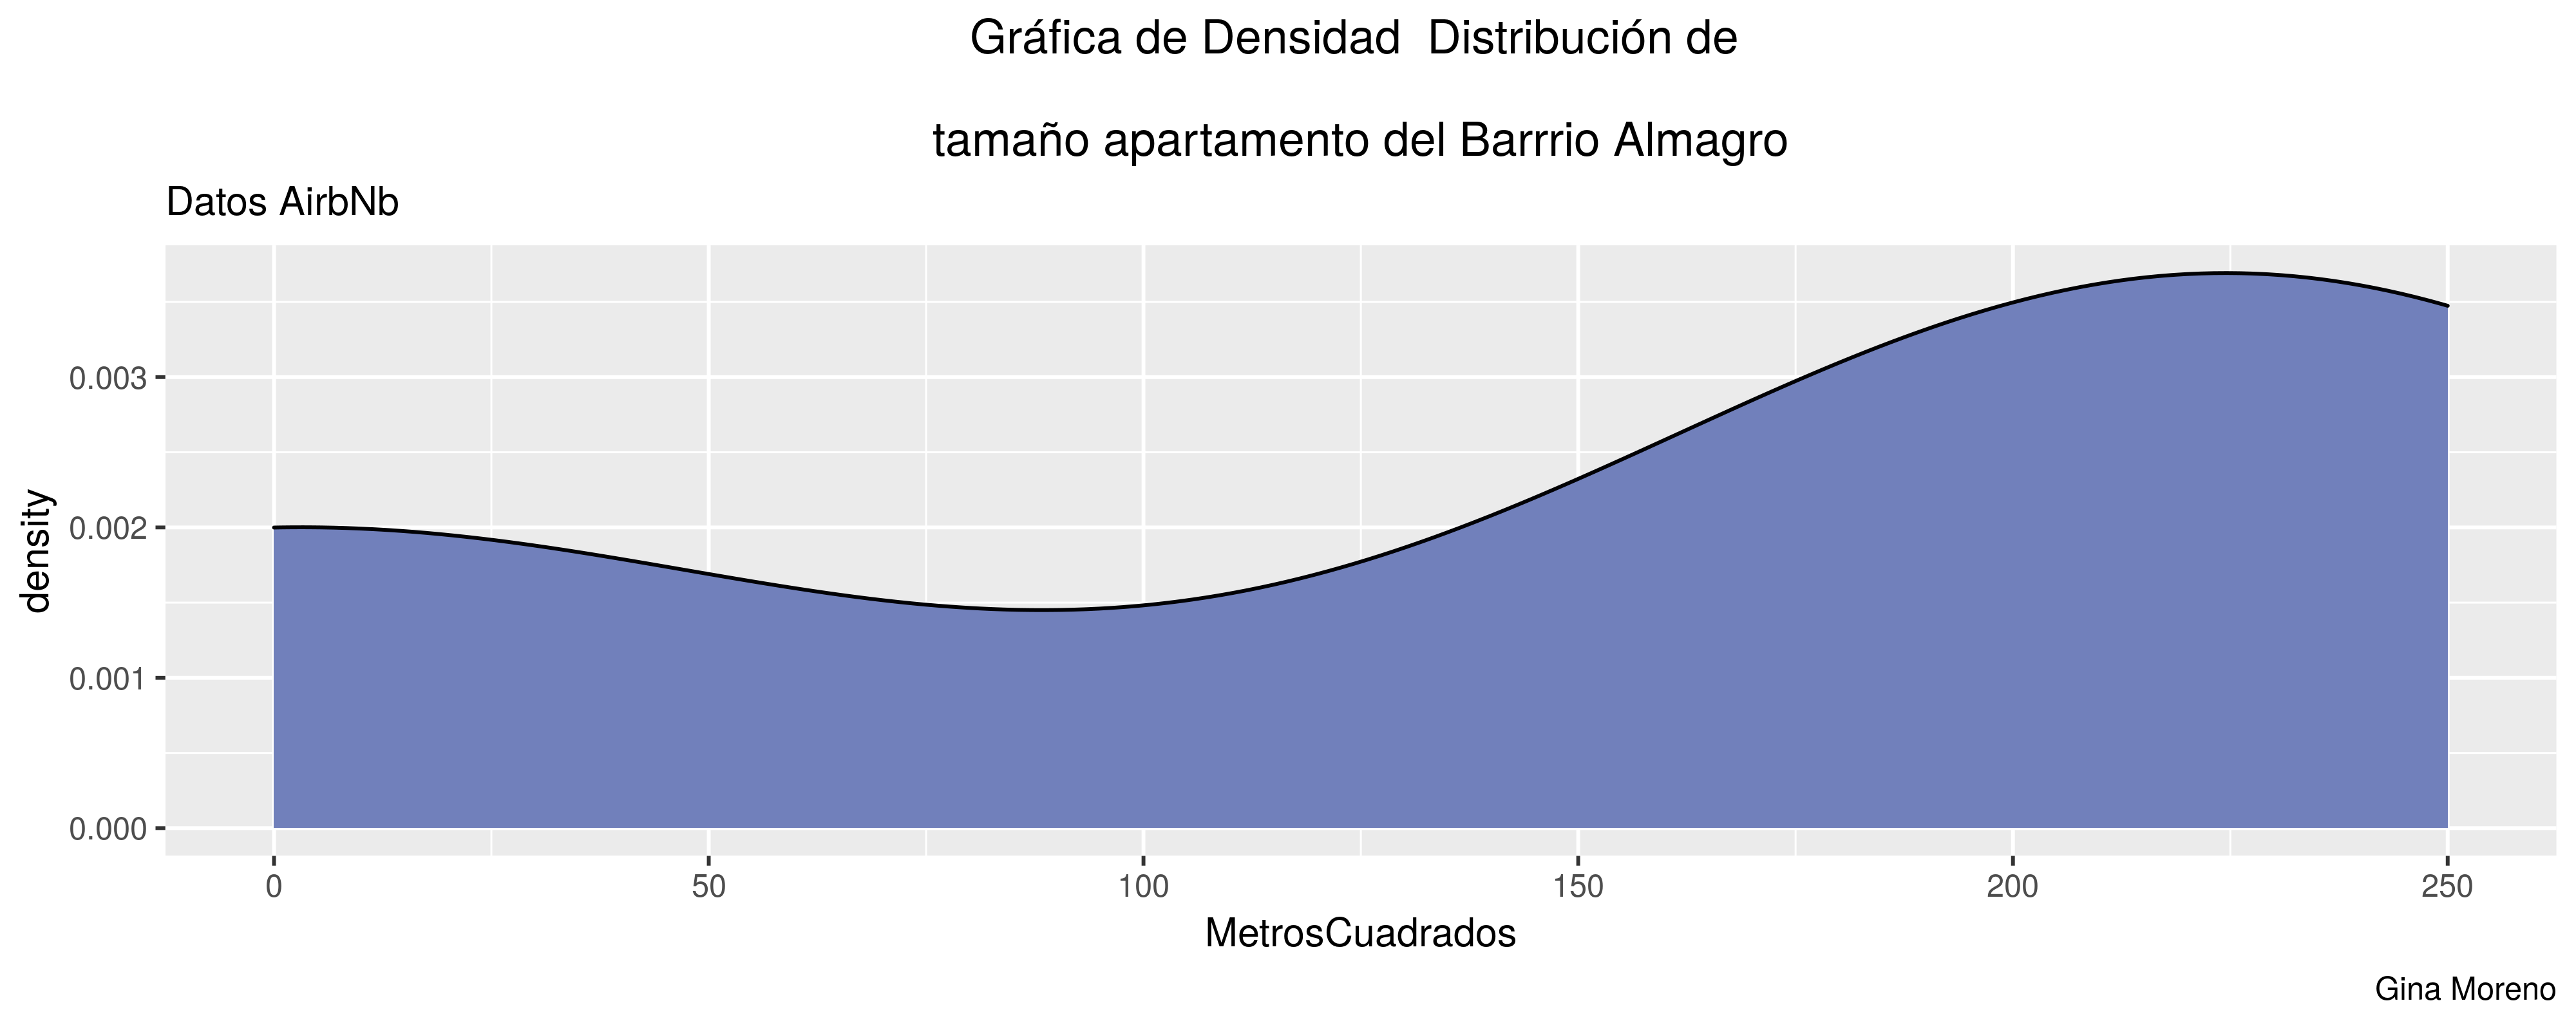

In [1271]:
Almagro_Apto<-as.data.frame(airbnbN%>%select(Barrio, MetrosCuadrados)%>%group_by(Barrio))%>%na.omit(Almagro_Apto)
Almagro_Apto<-Almagro_Apto%>%filter(Almagro_Apto$Barrio=="Almagro")
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
Almagro_Apto <- ggplot(data=Almagro_Apto,aes(x=MetrosCuadrados))+geom_density(fill="#7180BB", color="#010104")
Almagro_Apto+
labs(title="Gráfica de Densidad  Distribución de \n 
tamaño apartamento del Barrrio Almagro", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

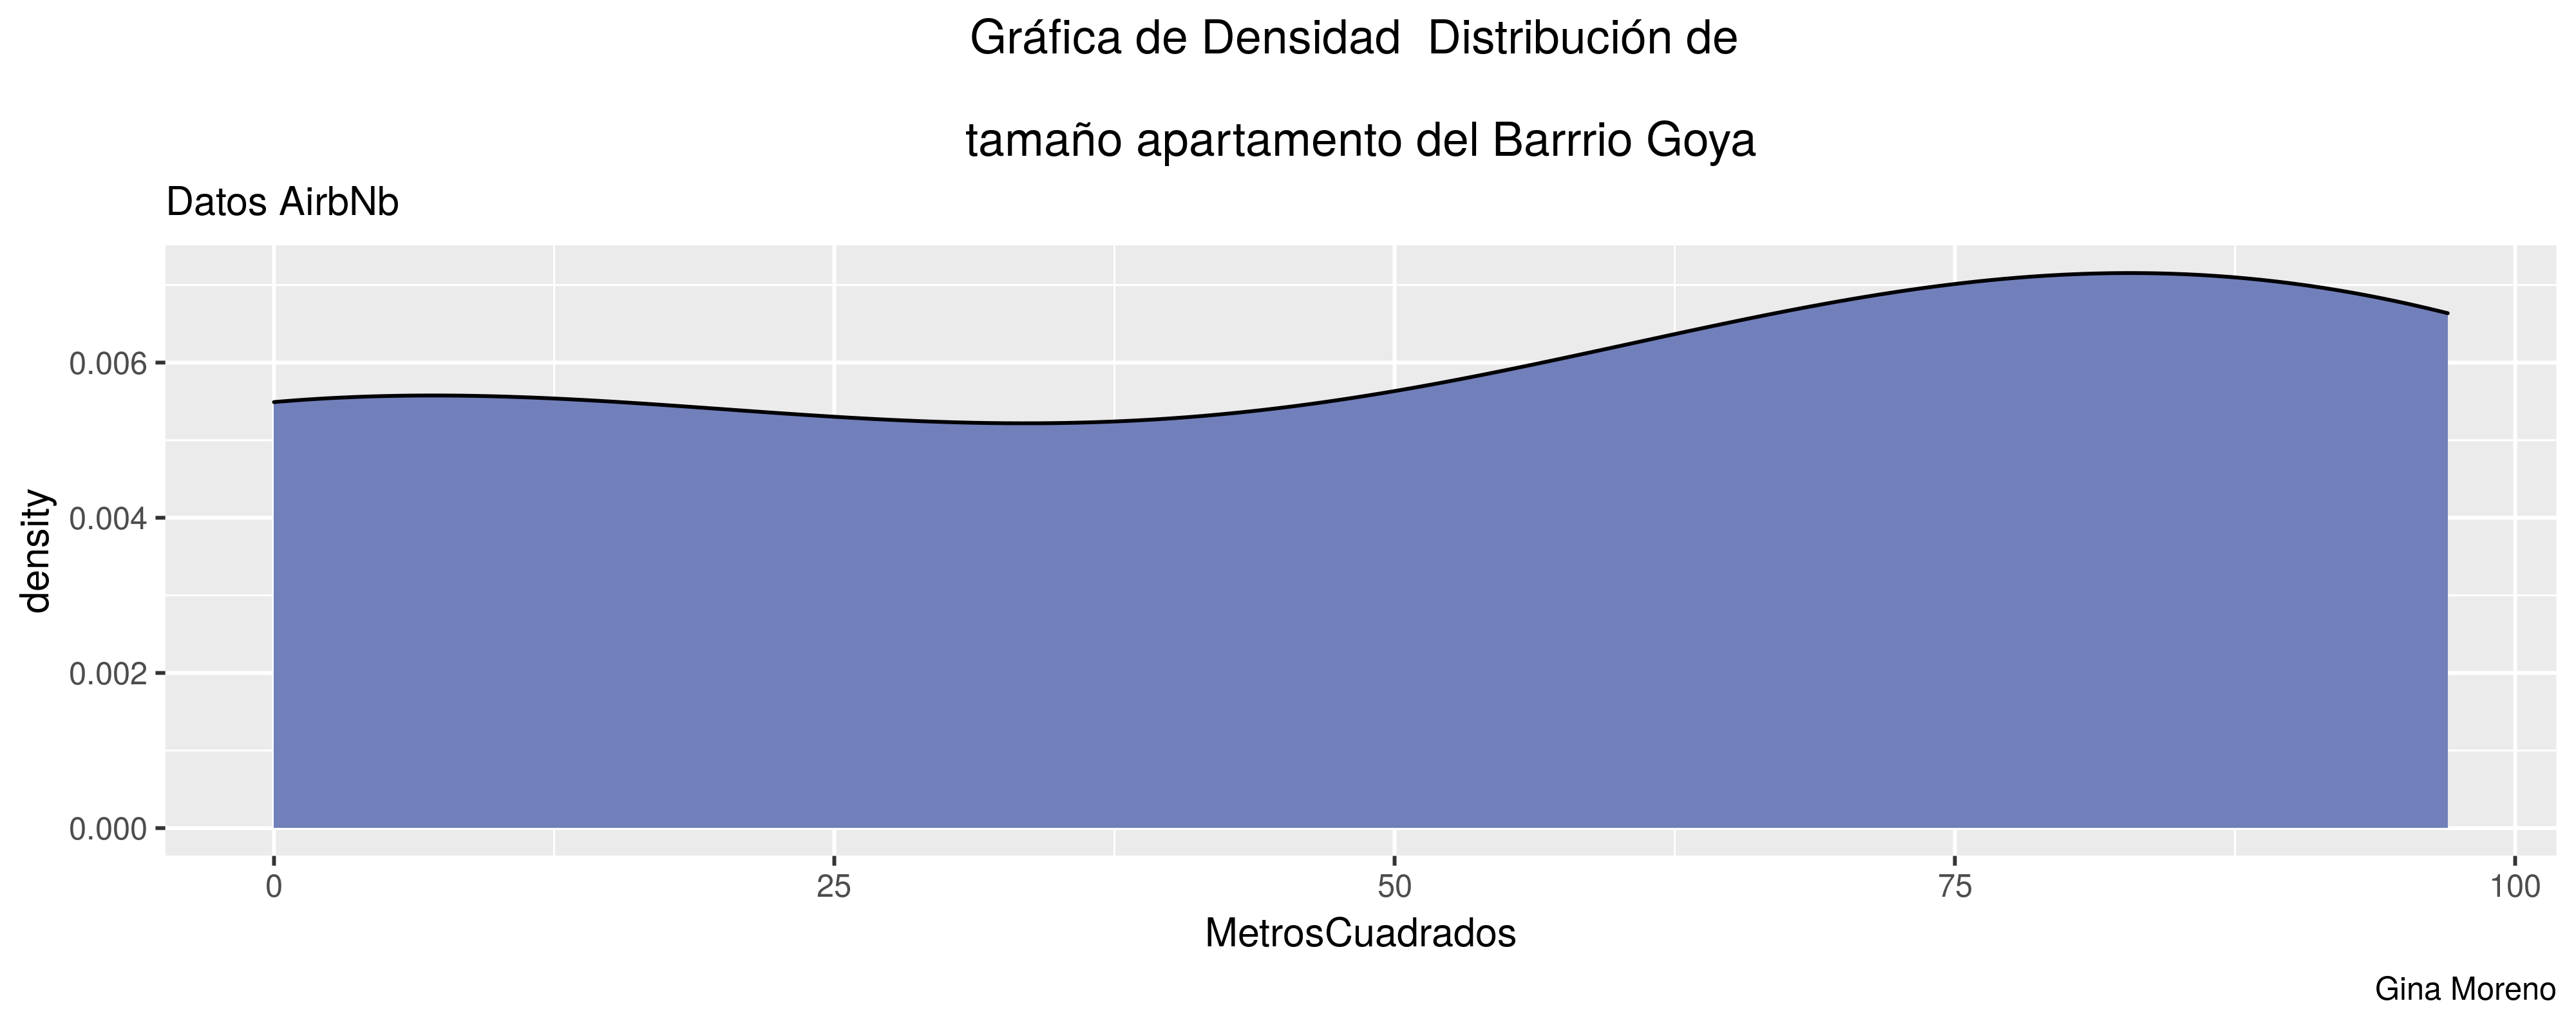

In [1270]:
Goya_Apto<-as.data.frame(airbnbN%>%select(Barrio, MetrosCuadrados)%>%group_by(Barrio))%>%na.omit(Goya_Apto)
Goya_Apto<-Goya_Apto%>%filter(Goya_Apto$Barrio=="Goya")
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
Goya_Apto <- ggplot(data=Goya_Apto,aes(x=MetrosCuadrados))+geom_density(fill="#7180BB", color="#010104")
Goya_Apto+
labs(title="Gráfica de Densidad  Distribución de \n 
tamaño apartamento del Barrrio Goya", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

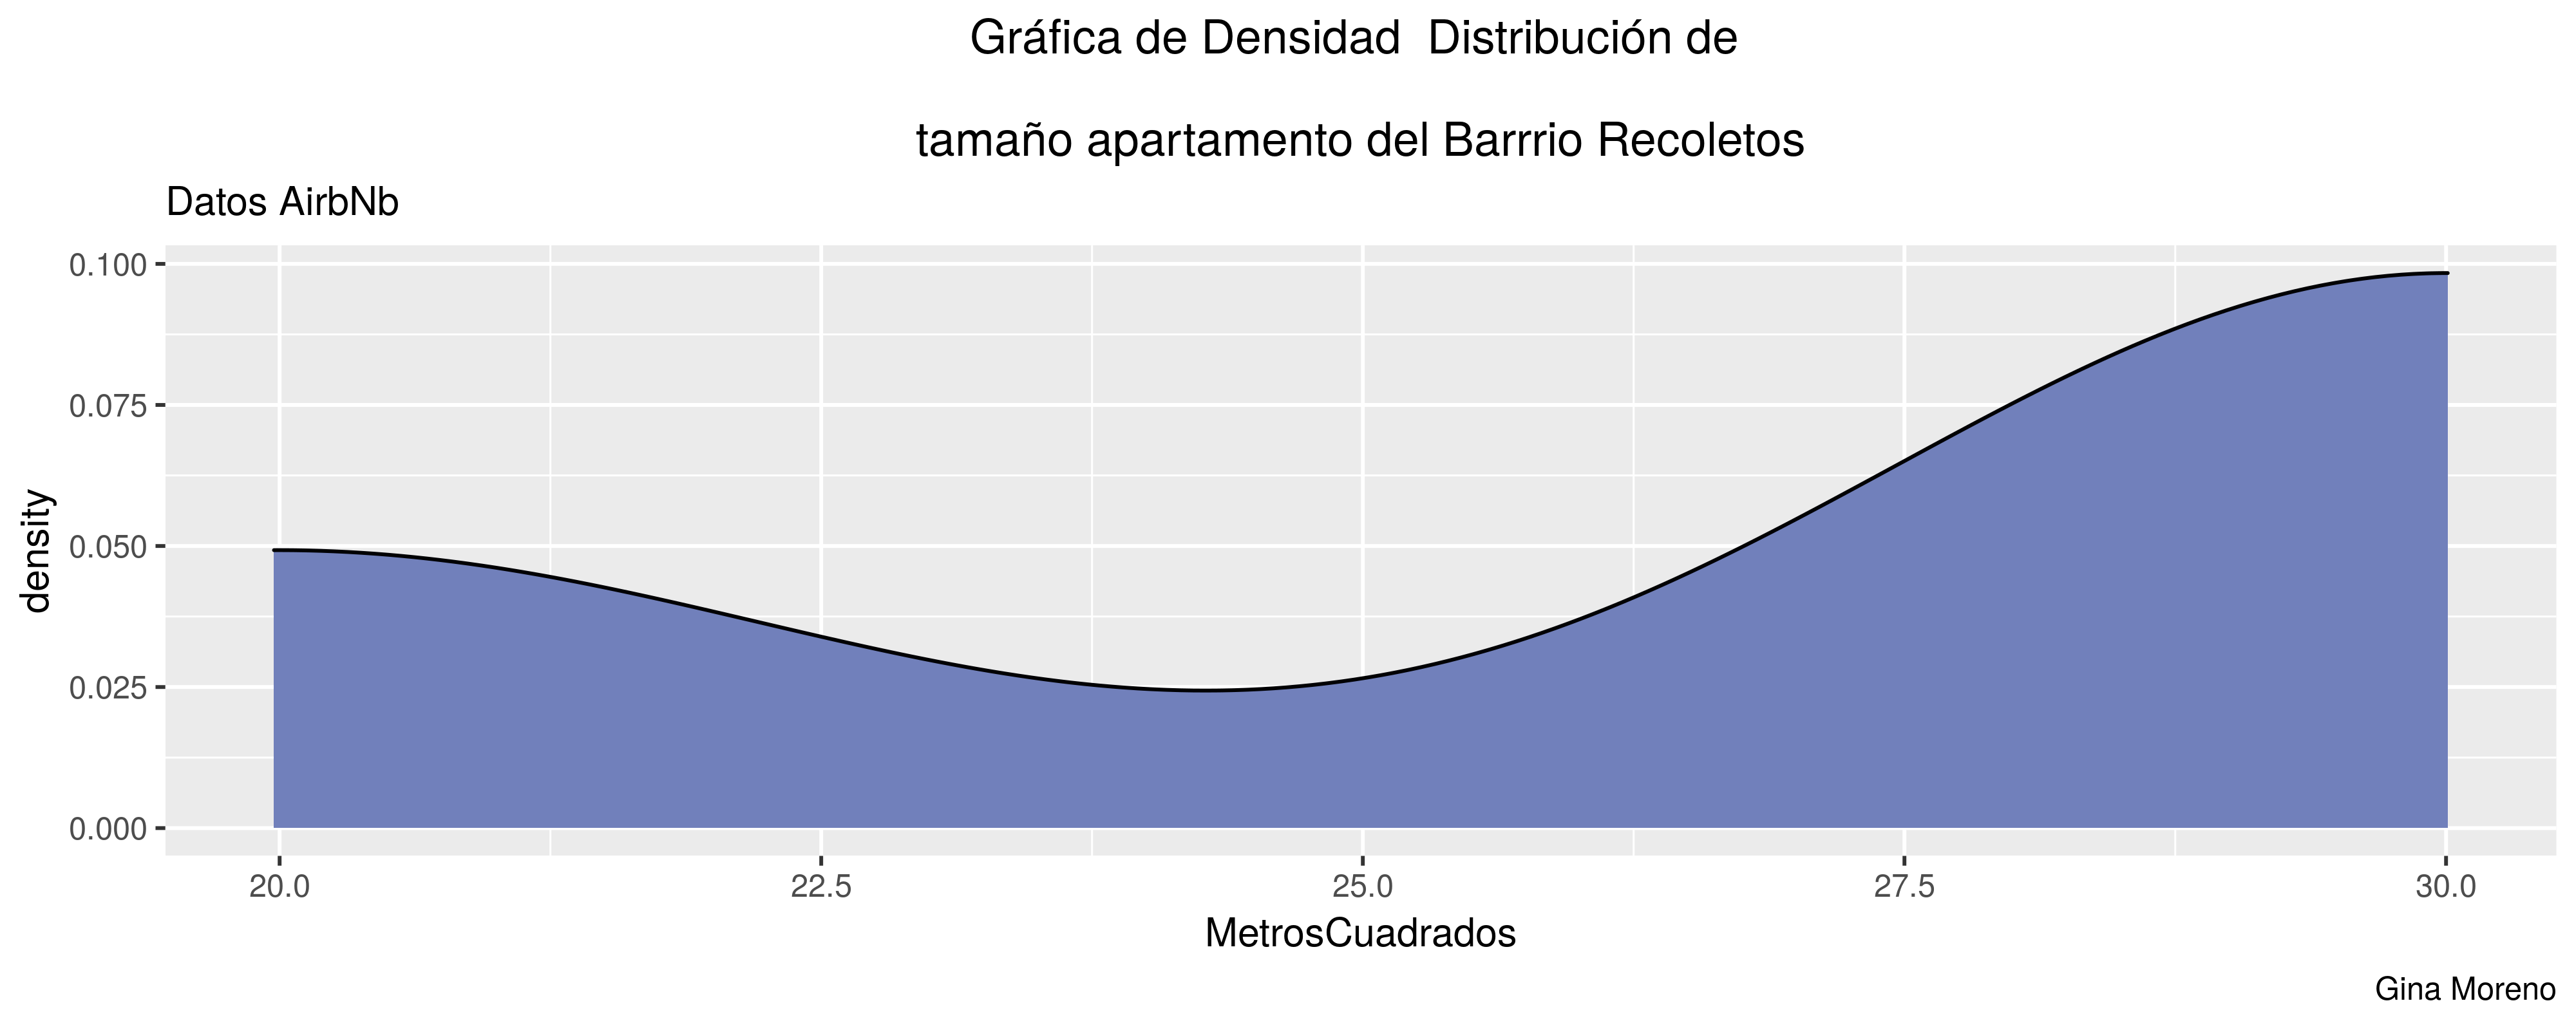

In [1269]:
Recoletos_Apto<-as.data.frame(airbnbN%>%select(Barrio, MetrosCuadrados)%>%group_by(Barrio))%>%na.omit(Recoletos_Apto)
Recoletos_Apto<-Recoletos_Apto%>%filter(Recoletos_Apto$Barrio=="Recoletos")
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
Recoletos_Apto <- ggplot(data=Recoletos_Apto,aes(x=MetrosCuadrados))+geom_density(fill="#7180BB", color="#010104")
Recoletos_Apto+
labs(title="Gráfica de Densidad  Distribución de \n 
tamaño apartamento del Barrrio Recoletos", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

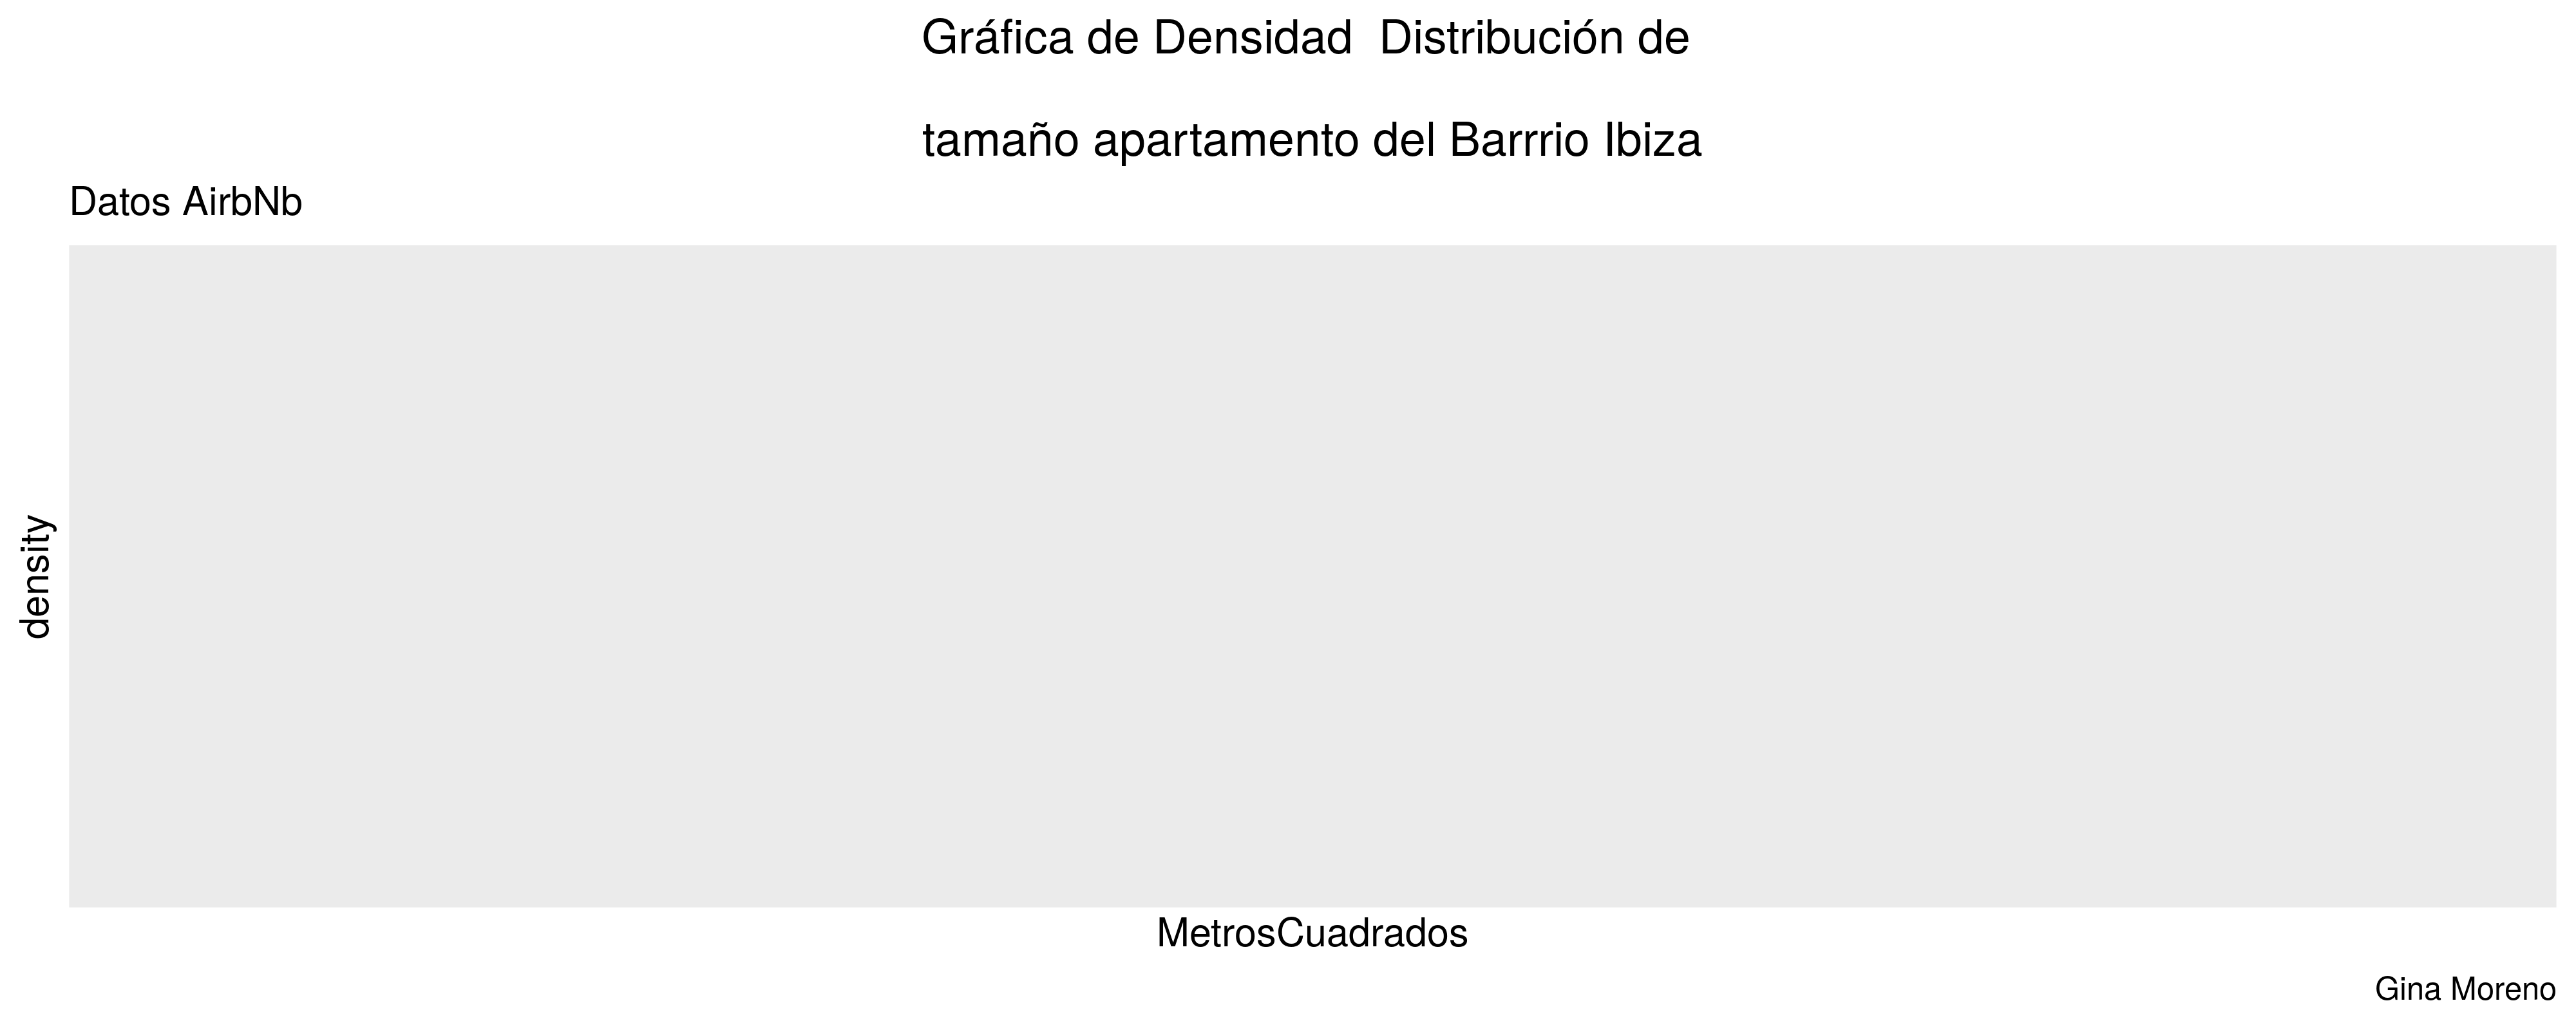

In [1259]:
##Los metroscuadrados de Ibiza tienen todos NA
Ibiza_Apto<-as.data.frame(airbnbN%>%select(Barrio, MetrosCuadrados)%>%group_by(Barrio))%>%na.omit(Ibiza_Apto)
Ibiza_Apto<-Ibiza_Apto%>%filter(Ibiza_Apto$Barrio=="Ibiza")
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
Ibiza_Apto <- ggplot(data=Ibiza_Apto,aes(x=MetrosCuadrados))+geom_density()
Ibiza_Apto+
labs(title="Gráfica de Densidad  Distribución de \n 
tamaño apartamento del Barrrio Ibiza", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

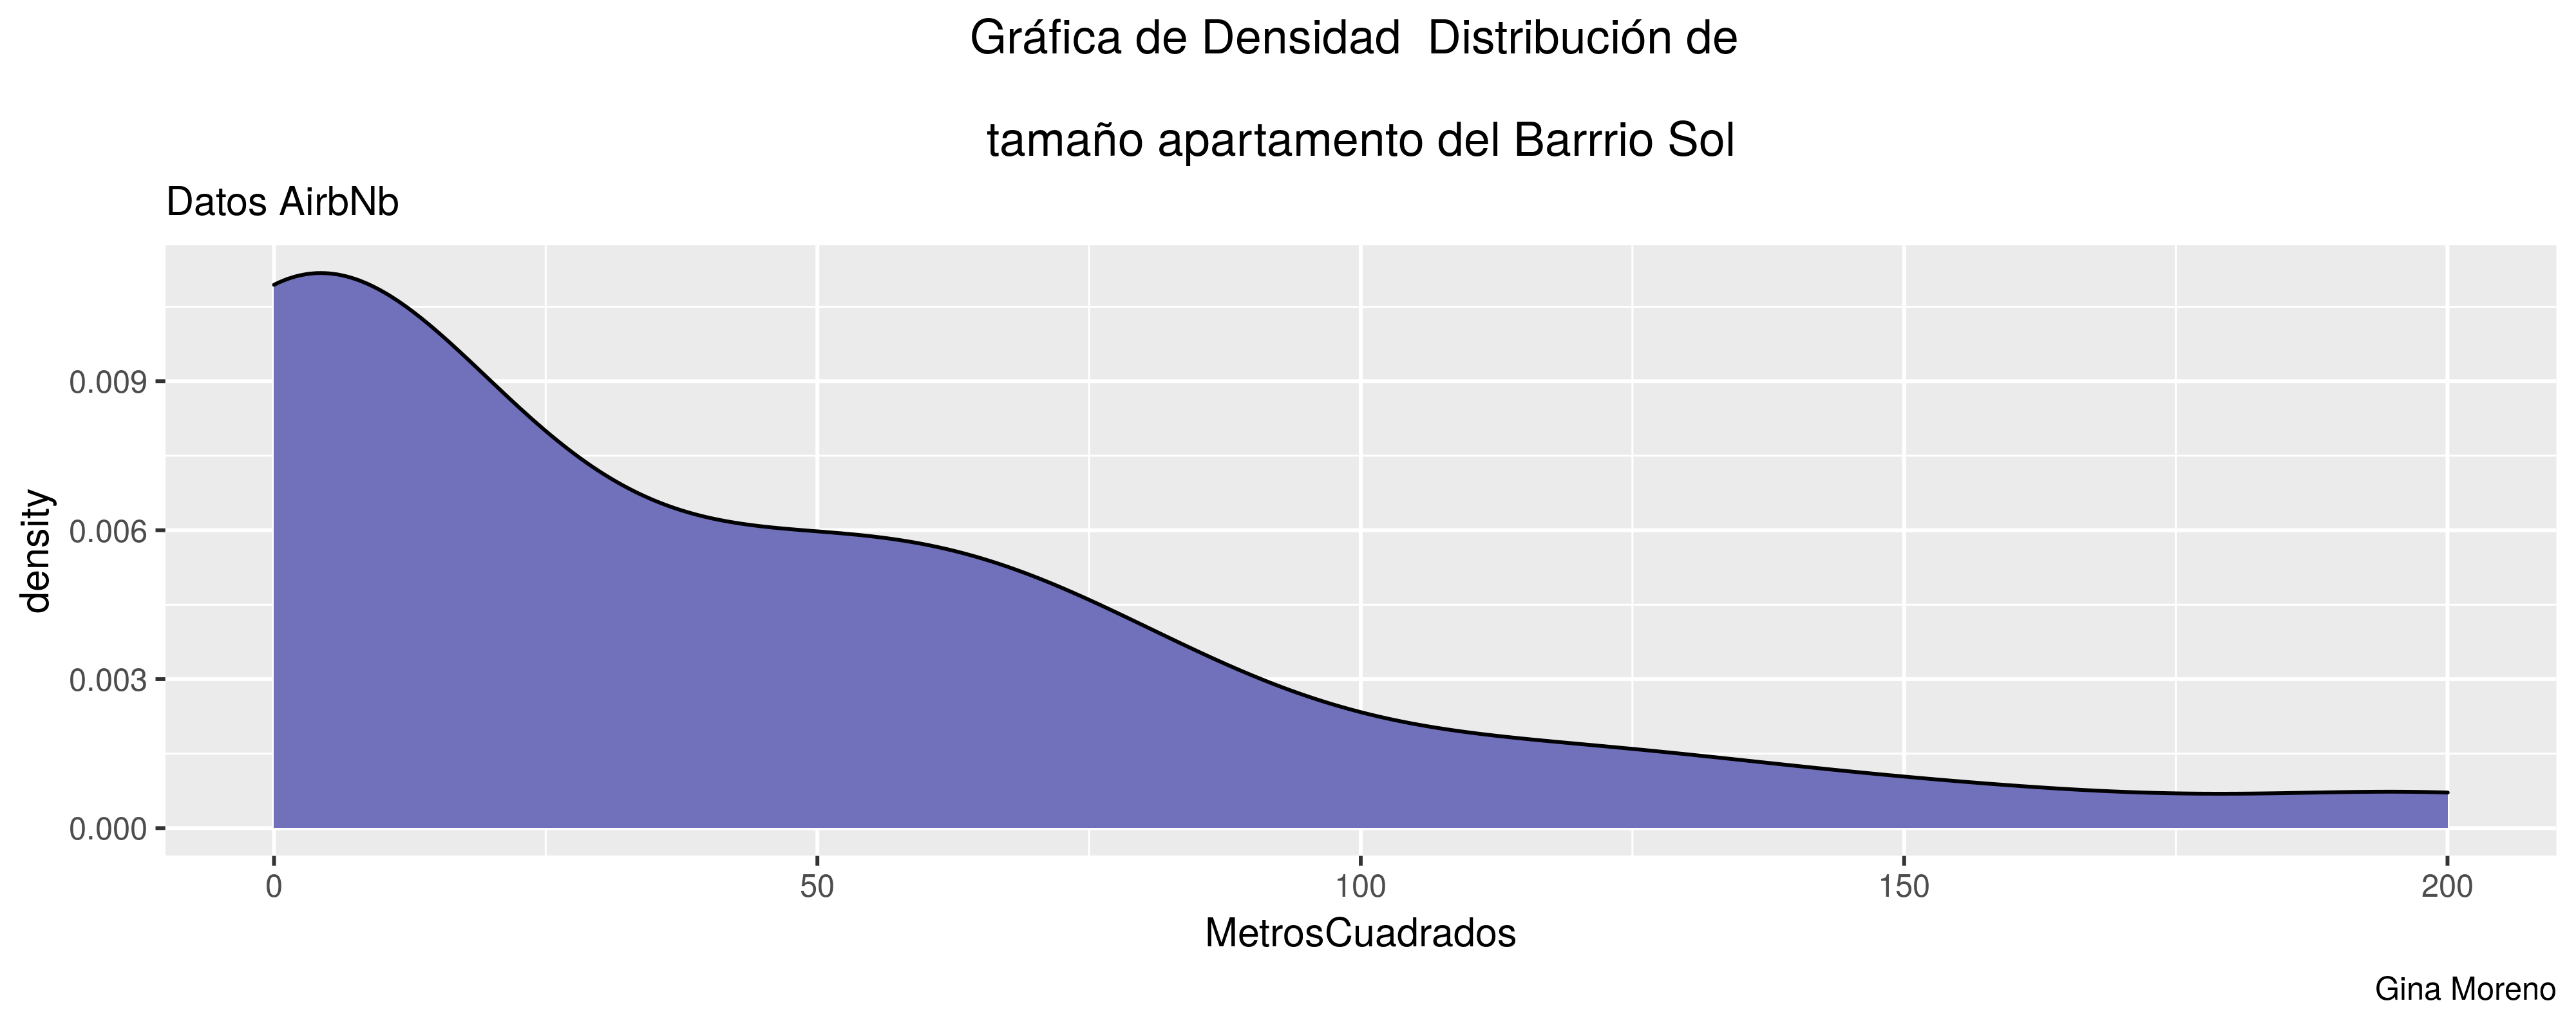

In [1265]:
Sol_Apto<-as.data.frame(airbnbN%>%select(Barrio, MetrosCuadrados)%>%group_by(Barrio))%>%na.omit(Sol_Apto)
Sol_Apto<-Sol_Apto%>%filter(Sol_Apto$Barrio=="Sol")
options(repr.plot.height=4, repr.plot.width=10, repr.plot.res=400)
Sol_Apto <- ggplot(data=Sol_Apto,aes(x=MetrosCuadrados))+geom_density(fill="#7070BB", color="#010101")
Sol_Apto+
labs(title="Gráfica de Densidad  Distribución de \n 
tamaño apartamento del Barrrio Sol", 
     subtitle="Datos AirbNb", 
     caption="Gina Moreno")+
    theme(plot.title=element_text(hjust=0.5))

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [1429]:
paste("nuestro pvalor es ",
shapiro.test(airbnbN$MetrosCuadrados)$p.value,
     "razón por lo que podemos decir que es Gausseana")


[1] "nuestro pvalor es  6.57428864233657e-29 razón por lo que podemos decir que es Gausseana"

In [1431]:
#Lo primero que debemos hacer es usar el test Shapiro para saber si los DF tiene distribución 
#Gaussiana, en nuestro caso el valor es 0.5 razón por la que muy probablemente si tiene la distribución

for(v in levels (airbnbN$Barrio)){
    print(paste("Barrio", v, "pvalue,", 
               shapiro.test(metros$MetrosCuadrados)$p.value))
}

[1] "Barrio Abrantes pvalue, 0.551041416855348"
[1] "Barrio Acacias pvalue, 0.551041416855348"
[1] "Barrio Adelfas pvalue, 0.551041416855348"
[1] "Barrio Aeropuerto pvalue, 0.551041416855348"
[1] "Barrio Aguilas pvalue, 0.551041416855348"
[1] "Barrio Alameda de Osuna pvalue, 0.551041416855348"
[1] "Barrio Almagro pvalue, 0.551041416855348"
[1] "Barrio Almenara pvalue, 0.551041416855348"
[1] "Barrio Almendrales pvalue, 0.551041416855348"
[1] "Barrio Aluche pvalue, 0.551041416855348"
[1] "Barrio Ambroz pvalue, 0.551041416855348"
[1] "Barrio Amposta pvalue, 0.551041416855348"
[1] "Barrio Apostol Santiago pvalue, 0.551041416855348"
[1] "Barrio Arapiles pvalue, 0.551041416855348"
[1] "Barrio Aravaca pvalue, 0.551041416855348"
[1] "Barrio Arcos pvalue, 0.551041416855348"
[1] "Barrio Argüelles pvalue, 0.551041416855348"
[1] "Barrio Atocha pvalue, 0.551041416855348"
[1] "Barrio Bellas Vistas pvalue, 0.551041416855348"
[1] "Barrio Berruguete pvalue, 0.551041416855348"
[1] "Barrio Buenavista pva

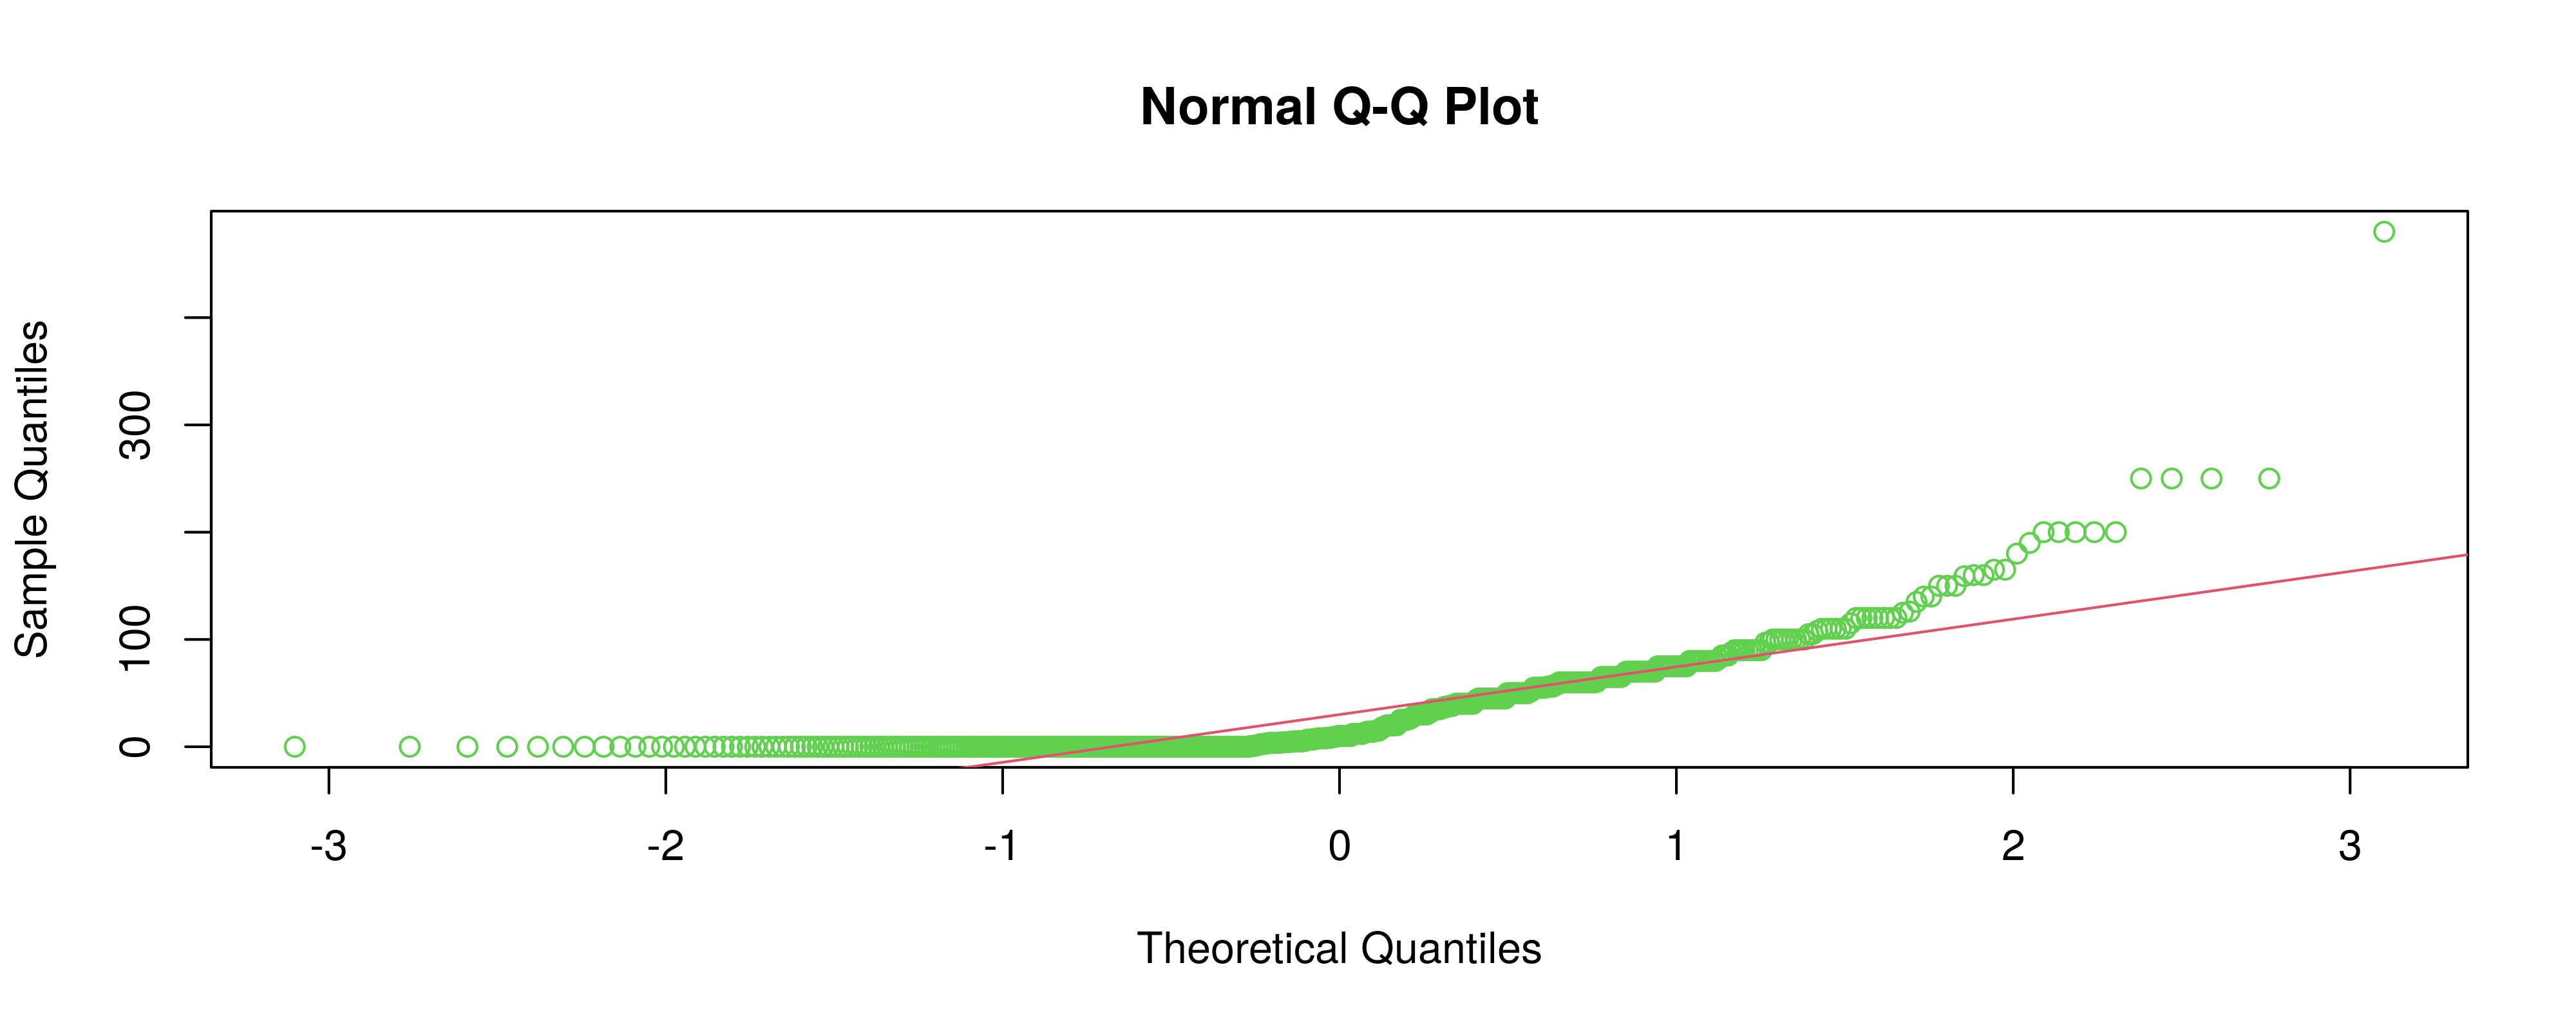

In [1434]:
qqnorm(airbnbN$MetrosCuadrados, col=3)
qqline(airbnbN$MetrosCuadrados, col=2)

Dado que el anovatest del df  df_metros ni con df metros el anova test me calculaba el Pvalor, usé el airbnbN(dataframeOriginal) y en este caso si me lo calculo, y en vista que el pvalor es 0.0195 considero que si es estadisticamente significativo la diferencia en metros cuadrados. 

In [1465]:
anovatest<-aov(MetrosCuadrados~Barrio, data=airbnbN)
summary(anovatest)

             Df  Sum Sq Mean Sq F value Pr(>F)  
Barrio       81  274877    3394   1.397 0.0195 *
Residuals   437 1061831    2430                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
12688 observations deleted due to missingness

In [1433]:
summary(airbnbN$MetrosCuadrados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   10.03   35.12   60.02  480.03   12688 

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [1479]:
barrio_sol<-subset(airbnb_entire, Barrio=="Sol")



CodigoPostal Barrio TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
9    28013        Sol    Apartment     Entire home/apt  4           1        
10   28013        Sol    Apartment     Entire home/apt  4           1        
11   28012        Sol    Apartment     Entire home/apt  6           1        
12   28013        Sol    Apartment     Entire home/apt  4           1        
13   28013        Sol    Apartment     Entire home/apt  4           1        
14   28005        Sol    Apartment     Entire home/apt 10           2        
15   28013        Sol    Apartment     Entire home/apt  6           1        
16   28012        Sol    Apartment     Entire home/apt  4           1        
17   28012        Sol    Apartment     Entire home/apt  4           1        
18   28013        Sol    Apartment     Entire home/apt  4           1        
19   28013        Sol    Apartment     Entire home/apt  6           2        
20   28005        Sol    Apartment     Entire home/apt  8           1        
23   28013        Sol    Apartment     Entire home/apt  4           1        
24   28013        Sol    Apartment     Entire home/apt  6           2        
25   28013        Sol    Apartment     Entire home/apt  3           1        
26   28013        Sol    Apartment     Entire home/apt  2           1        
27   28013        Sol    Apartment     Entire home/apt  3           1        
28   28012        Sol    Apartment     Entire home/apt  3           1        
29   28013        Sol    Apartment     Entire home/apt  4           1        
30   28012        Sol    Apartment     Entire home/apt  4           2        
31   28013        Sol    Apartment     Entire home/apt  4           1        
32   28013        Sol    Apartment     Entire home/apt  4           1        
33   28012        Sol    Apartment     Entire home/apt  4           1        
294  28012        Sol    Apartment     Entire home/apt 16           4        
295  28012        Sol    Apartment     Entire home/apt  5           2        
296  28012        Sol    Apartment     Entire home/apt  8           1        
297  28012        Sol    Apartment     Entire home/apt  4           1        
298  28013        Sol    Apartment     Entire home/apt  6           2        
299  28014        Sol    Apartment     Entire home/apt  8           2        
300  28012        Sol    Apartment     Entire home/apt  2           1        
⋮    ⋮            ⋮      ⋮             ⋮               ⋮            ⋮        
6726 28012        Sol    Apartment     Entire home/apt  4           1        
6727 28013        Sol    Apartment     Entire home/apt  6           2        
6728 28013        Sol    Apartment     Entire home/apt  2           1        
6729 28013        Sol    Apartment     Entire home/apt  4           1        
6730 28012        Sol    Apartment     Entire home/apt  4           1        
6731 28013        Sol    Apartment     Entire home/apt  4           1        
6821 28013        Sol    Apartment     Entire home/apt  6           2        
6822 28005        Sol    Apartment     Entire home/apt  6           1        
6823 28013        Sol    Apartment     Entire home/apt  6           1        
6824 28013        Sol    Apartment     Entire home/apt  3           1        
6825 28013        Sol    Apartment     Entire home/apt 10           3        
6826 28013        Sol    Apartment     Entire home/apt  4           1        
6827 28013        Sol    Apartment     Entire home/apt  4           1        
6828 28013        Sol    Apartment     Entire home/apt  4           1        
6829 28013        Sol    Apartment     Entire home/apt  4           1        
6830 28012        Sol    Apartment     Entire home/apt  4           1        
6831 28004        Sol    Apartment     Entire home/apt  4           1        
6832 28013        Sol    Apartment     Entire home/apt  2           1        
6833 28012        Sol    Apartment     Entire home/apt  6           1        
6834 28013        Sol    Ap

In [1519]:
summary(barrio_sol)

  CodigoPostal          Barrio            TipoPropiedad          TipoAlquiler
 Min.   :28001   Sol       :648   Apartment      :648   Entire home/apt:648  
 1st Qu.:28012   Abrantes  :  0   Bed & Breakfast:  0   Private room   :  0  
 Median :28013   Acacias   :  0   Boat           :  0   Shared room    :  0  
 Mean   :28012   Adelfas   :  0   Boutique hotel :  0                        
 3rd Qu.:28013   Aeropuerto:  0   Bungalow       :  0                        
 Max.   :28034   Aguilas   :  0   Camper/RV      :  0                        
 NA's   :12      (Other)   :  0   (Other)        :  0                        
  MaxOcupantes     NumBanyos     NumDormitorios      NumCamas    
 Min.   : 1.00   Min.   :1.000   Min.   : 0.000   Min.   : 1.00  
 1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.00  
 Median : 4.00   Median :1.000   Median : 1.000   Median : 2.00  
 Mean   : 4.65   Mean   :1.274   Mean   : 1.448   Mean   : 2.65  
 3rd Qu.: 6.00   3rd Qu.:1.125   3rd Qu.: 2.00

In [1520]:
dim(barrio_sol)

[1] 648  14

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [1492]:

summary(aov(Precio~ MetrosCuadrados+NumDormitorios+MaxOcupantes+NumBanyos, barrio_sol))


                Df Sum Sq Mean Sq F value   Pr(>F)    
MetrosCuadrados  1  54990   54990  57.149 8.02e-10 ***
NumDormitorios   1  32718   32718  34.003 4.00e-07 ***
MaxOcupantes     1   2631    2631   2.734    0.104    
NumBanyos        1   1219    1219   1.267    0.266    
Residuals       50  48111     962                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
593 observations deleted due to missingness

In [1495]:
regresion2<-lm(NumDormitorios~ MetrosCuadrados+NumBanyos+Precio+MaxOcupantes, barrio_sol)
summary(regresion2)


Call:
lm(formula = NumDormitorios ~ MetrosCuadrados + NumBanyos + Precio + 
    MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7501 -0.2285 -0.0295  0.3309  0.7539 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.5493551  0.1737719  -3.161  0.00267 ** 
MetrosCuadrados  0.0001676  0.0017006   0.099  0.92189    
NumBanyos        0.1341739  0.1582949   0.848  0.40069    
Precio           0.0086448  0.0018970   4.557 3.36e-05 ***
MaxOcupantes     0.2063246  0.0337243   6.118 1.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.495 on 50 degrees of freedom
  (593 observations deleted due to missingness)
Multiple R-squared:  0.8077,	Adjusted R-squared:  0.7923 
F-statistic:  52.5 on 4 and 50 DF,  p-value: < 2.2e-16


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


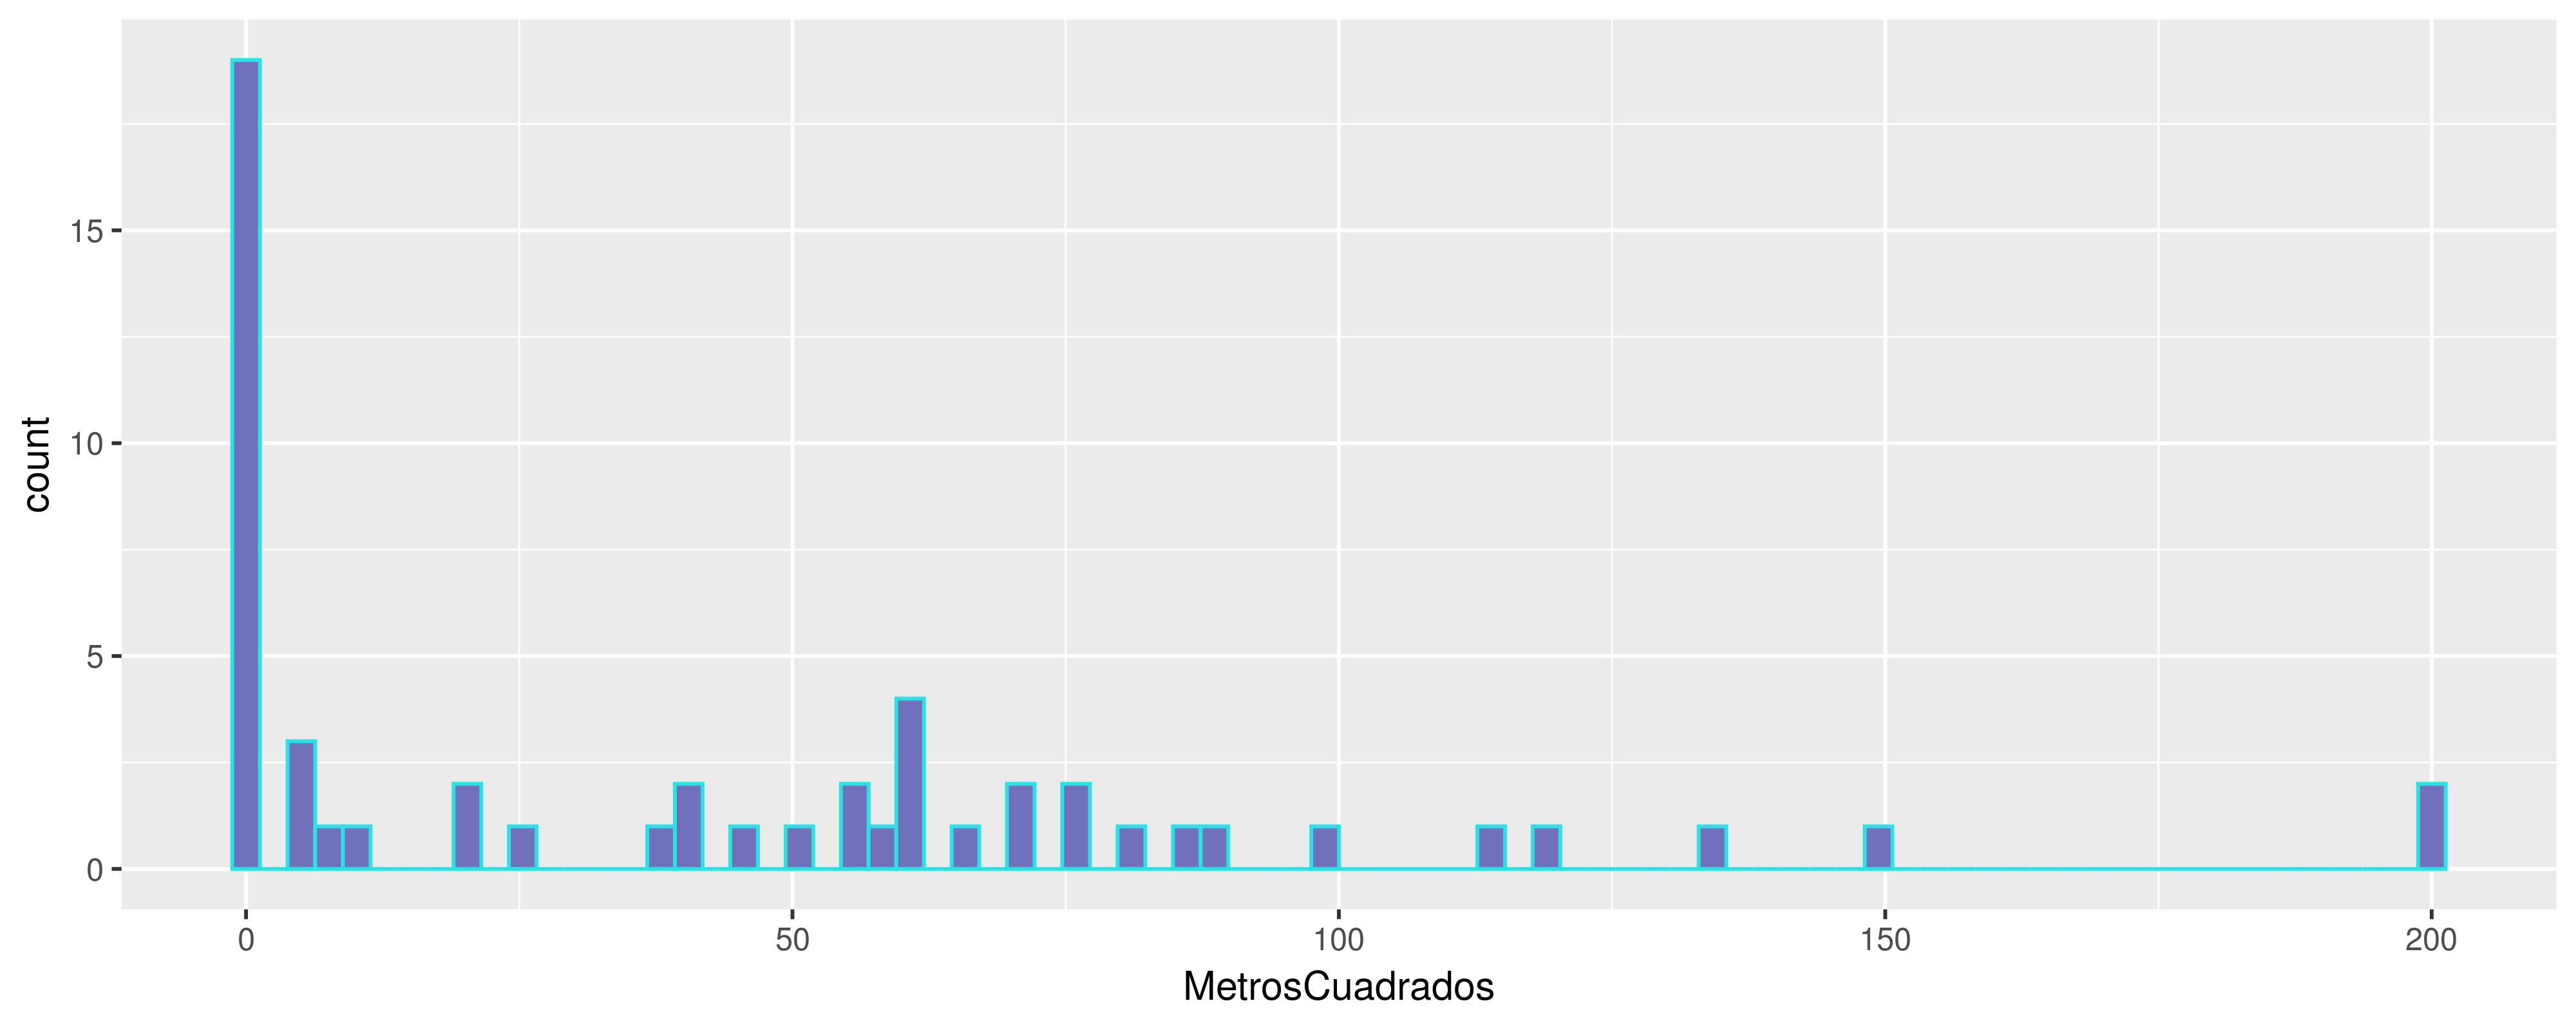

In [1511]:
barrio_solmts<-na.omit(barrio_sol)
Sol_Relacion <- ggplot(data=barrio_solmts,aes(x=MetrosCuadrados))+
geom_histogram(bins=80, fill="#7070BB", color="010101")
Sol_Relacion

In [1518]:
#veremos la información de los apartamentos con menos de 20 mts
Sol_menor<-filter(barrio_solmts,MetrosCuadrados<=20)

dim(Sol_menor)

[1] 26 14

In [1714]:
Sol_menor<-filter(barrio_solmts,MetrosCuadrados>20)

dim(Sol_menor)
Sol_menor

[1] 28 14

CodigoPostal Barrio TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1  28013        Sol    Apartment     Entire home/apt  4           1        
2  28012        Sol    Apartment     Entire home/apt  4           1        
3  28013        Sol    Apartment     Entire home/apt  2           1        
4  28014        Sol    Apartment     Entire home/apt  8           2        
5  28012        Sol    Apartment     Entire home/apt  4           1        
6  28012        Sol    Apartment     Entire home/apt 10           2        
7  28013        Sol    Apartment     Entire home/apt  4           1        
8  28013        Sol    Apartment     Entire home/apt  3           1        
9  28012        Sol    Apartment     Entire home/apt  8           1        
10 28005        Sol    Apartment     Entire home/apt  4           1        
11 28013        Sol    Apartment     Entire home/apt  4           1        
12 28004        Sol    Apartment     Entire home/apt  3           1        
13 28013        Sol    Apartment     Entire home/apt  2           1        
14 28013        Sol    Apartment     Entire home/apt  4           1        
15 28012        Sol    Apartment     Entire home/apt 10           2        
16 28004        Sol    Apartment     Entire home/apt  4           1        
17 28012        Sol    Apartment     Entire home/apt  4           1        
18 28013        Sol    Apartment     Entire home/apt 12           4        
19 28012        Sol    Apartment     Entire home/apt  6           2        
20 28012        Sol    Apartment     Entire home/apt  8           2        
21 28012        Sol    Apartment     Entire home/apt  4           1        
22 28012        Sol    Apartment     Entire home/apt  4           1        
23 28013        Sol    Apartment     Entire home/apt  6           1        
24 28013        Sol    Apartment     Entire home/apt  5           1        
25 28012        Sol    Apartment     Entire home/apt  6           2        
26 28012        Sol    Apartment     Entire home/apt  4           1        
27 28013        Sol    Apartment     Entire home/apt 10           3        
28 28013        Sol    Apartment     Entire home/apt  4           1        
   NumDormitorios NumCamas TipoCama
1  1              1        Real Bed
2  1              1        Real Bed
3  1              1        Real Bed
4  4              5        Real Bed
5  1              2        Real Bed
6  2              6        Real Bed
7  1              2        Real Bed
8  0              1        Real Bed
9  2              6        Real Bed
10 1              2        Futon   
11 1              1        Real Bed
12 1              1        Real Bed
13 1              1        Real Bed
14 1              1        Real Bed
15 5              8        Real Bed
16 0              3        Real Bed
17 1              1        Real Bed
18 4              8        Real Bed
19 3              4        Real Bed
20 2              8        Real Bed
21 1              3        Real Bed
22 1              3        Real Bed
23 2              3        Real Bed
24 2              5        Real Bed
25 2              3        Real Bed
26 2              3        Real Bed
27 3              7        Real Bed
28 1              2        Real Bed
   Comodidades                                                                                                                                                                                                                                                                                                                                  
1  TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron                                                                                                                                                
2  TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in bu

In [ ]:
Los datos no son fiables porque si vemos las entradas de sol son 648 de los cuales 593 son NA y 
26 apartamentos tienen menos de 20 metros cuadrados, quedando solo 28 entradas de apartamentos útiles, así que 
definitivamente los datos recolectados válidos no son suficientes para determinar la correlación de MetrosCuadrados 
y dormitorios

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [1580]:
regresion3<-lm(Precio~ MetrosCuadrados+NumBanyos+NumDormitorios+MaxOcupantes, Sol_menor)
summary(regresion3)


Call:
lm(formula = Precio ~ MetrosCuadrados + NumBanyos + NumDormitorios + 
    MaxOcupantes, data = Sol_menor)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.587 -16.522  -0.048  16.656  39.825 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      24.4833    11.1710   2.192   0.0388 *  
MetrosCuadrados   0.1471     0.1560   0.943   0.3555    
NumBanyos         7.0024    11.2399   0.623   0.5394    
NumDormitorios   47.0294     7.7949   6.033 3.75e-06 ***
MaxOcupantes     -2.2251     3.6786  -0.605   0.5512    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.43 on 23 degrees of freedom
Multiple R-squared:  0.8943,	Adjusted R-squared:  0.8759 
F-statistic: 48.63 on 4 and 23 DF,  p-value: 6.781e-11


La combinación de valores que mejor nos permite obtener el precio de un inmueble es el NumDormitorios con los Metros Cudrados qué es el p valor más bajo-

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

Aunque los metros cuadrados son significativos, el número de habitaciones  
 definitivamente tiene un valor P más significativo, veamos los resultados:

In [1657]:
model_DormMts<-lm(Precio~NumDormitorios +MetrosCuadrados, Sol_menor)
summary(model_DormMts)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = Sol_menor)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.468 -14.940   0.169  15.930  38.824 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      23.9443     8.6520   2.767   0.0105 *  
NumDormitorios   46.4690     5.6605   8.209 1.46e-08 ***
MetrosCuadrados   0.1377     0.1505   0.915   0.3691    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.73 on 25 degrees of freedom
Multiple R-squared:  0.8921,	Adjusted R-squared:  0.8835 
F-statistic: 103.4 on 2 and 25 DF,  p-value: 8.152e-13


In [1658]:
regresion4<-lm(Precio~NumDormitorios , Sol_menor)
summary(regresion4)


Call:
lm(formula = Precio ~ NumDormitorios, data = Sol_menor)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.382 -15.240  -0.359  19.060  39.664 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.336      7.174    3.95 0.000533 ***
NumDormitorios   50.523      3.510   14.39 6.72e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.67 on 26 degrees of freedom
Multiple R-squared:  0.8885,	Adjusted R-squared:  0.8842 
F-statistic: 207.2 on 1 and 26 DF,  p-value: 6.723e-14


In [1608]:
regresion_Mts<-lm(Precio~MetrosCuadrados , Sol_menor)
summary(regresion_Mts)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = Sol_menor)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.461 -17.318  -0.578   8.221 110.903 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      23.2522    16.3091   1.426    0.166    
MetrosCuadrados   1.1053     0.1765   6.262 1.26e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.97 on 26 degrees of freedom
Multiple R-squared:  0.6013,	Adjusted R-squared:  0.586 
F-statistic: 39.22 on 1 and 26 DF,  p-value: 1.256e-06


viendo el coeficiente de determinación  el Rcuadrado ajustado en la correlación con los Dormitorios nos indica que en un 88%  se puede predecir el precio del apartamento con 
con el número de habitaciones, teniendo un pvalue menor a 0.5 podemos decir que 
el numero de habitaciones es altamente significativo. A diferencia con los mts cuadrados que 
el R-squared es de solo 58%  y con un Pvalor mucho menor, razón que las habitaciones podríamos predecir el precio de un inmueble (apto) 

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [1679]:
regresion_Mts$coefficients


(Intercept) MetrosCuadrados 
      23.252189        1.105349

In [1684]:
exp(regresion_Mts$coefficients[2])
#cuanto más aumenta los metros, hay un 3.2 veces más probabilidad de aumentar el precio del inmueble 
confint(regresion_Mts)

MetrosCuadrados 
        3.02028

2.5 %       97.5 %   
(Intercept)     -10.2716477 56.776025
MetrosCuadrados   0.7425382  1.468161

In [ ]:
Por cada metro cuadrado el precio aumenta en 1.10

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [1685]:
regresion4$coefficients

(Intercept) NumDormitorios 
      28.33646       50.52296

In [1686]:
exp(regresion4$coefficients[2])
#cuanto más aumentan los dormitorios, hay un 8.74 veces más probabilidad de aumentar el precio del inmueble 
confint(regresion4)

NumDormitorios 
  8.746684e+21

2.5 %    97.5 %  
(Intercept)    13.58944 43.08347
NumDormitorios 43.30873 57.73719

In [ ]:
Por cada habitación de más se aumenta el precio un 50.52 

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [1696]:
Sol_menor8<-filter(Sol_menor,NumDormitorios=="3")
Sol_menor8

CodigoPostal Barrio TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28012        Sol    Apartment     Entire home/apt  6           2        
2 28013        Sol    Apartment     Entire home/apt 10           3        
  NumDormitorios NumCamas TipoCama
1 3              4        Real Bed
2 3              7        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                  
1 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Suitable for events,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace
2 TV,Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer                                                                                                                                                                                                                         
  PiesCuadrados Precio Puntuacion MetrosCuadrados
1 2153          199    96         200.02016      
2  807          150    65          74.97272

In [1750]:
which(Sol_menor$NumDormitorios=="3")

[1] 19 27

In [1805]:
Aptos_NumDorm <-28/2/100
paste("la probabilidad de encontrar un apartamento de 3 habitaciones en el barrio el son es de" ,Aptos_NumDorm, 
      "y el intervalo de confianza es")
binom.test(2,28)


[1] "la probabilidad de encontrar un apartamento de 3 habitaciones en el barrio el son es de 0.14 y el intervalo de confianza es"


	Exact binomial test

data:  2 and 28
number of successes = 2, number of trials = 28, p-value = 3.032e-06
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.008770497 0.235034773
sample estimates:
probability of success 
            0.07142857 
